In [16]:
import os
import pandas as pd
from Environment import Environment
from Agent import Agent
from Standardization import Preprocessor
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
from Plot_K_Line_transaction import draw_transaction
from Financial_Tools import MaxDrawdown, SharpeRatio
import seaborn as sns
import torch

In [17]:
#!pip install numpy==1.21.2

In [18]:
def sort_df_from_now_to_past(df):
    sorted_df = df.copy()
    
    # Check if the DataFrame contains separate columns for year, month, and day
    if 'YEAR' in sorted_df.columns and 'MONTH' in sorted_df.columns and 'DAY' in sorted_df.columns:
        sorted_df['DATETIME'] = pd.to_datetime(sorted_df[['YEAR', 'MONTH', 'DAY']])
    elif 'DATE' in sorted_df.columns:
        sorted_df['DATETIME'] = pd.to_datetime(sorted_df['DATE'])
    else:
        print("Could not find datetime information in the DataFrame.")
        return sorted_df
    
    # Sort the DataFrame from now to past
    sorted_df = sorted_df.sort_values(by='DATETIME', ascending=False)  # Sort in descending order
    
    return sorted_df


# Change directory to the data folder
%cd Data

Products = []
# Iterate through all folders
for folder in os.listdir():

  Products.append(folder)

  # Change directory to the current folder
  %cd {folder}

  # Read the source.csv file
  df = pd.read_csv('source.csv')


  df.columns = map(str.upper, df.columns)

  if "New" in folder:
    df = df.rename(columns={"VOLUMN": "VOLUME"})

  print(df.columns)
  
  if 'CLOSE/LAST' in df.columns:
        df = df.rename(columns={'CLOSE/LAST': 'CLOSE'})
  
  
  df = sort_df_from_now_to_past(df)

  # Drop all columns except OPEN, CLOSE, HIGH, LOW, VOLUME
  df = df[  ['OPEN','CLOSE','HIGH','LOW','VOLUME'] ]
  
  #take 1 year of df
  df = df.iloc[:365]
  # Save the changes to the source.csv file
  df.to_csv('source.csv', index=False,  float_format='%.17f')

  # Change directory back to the parent folder
  %cd ..

C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\AIRBUS
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\APPLE
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\AUDUSD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RE

C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWar

Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\New D_EURCAD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\New D_EURUSD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quant

C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWar

Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\USD100M1
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance\Data\XAUUSD
Index(['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'RETURN', 'QPL', 'QPL+',
       'QPL-', 'MA5', 'MA21', 'RSI'],
      dtype='object')
Could not find datetime information in the DataFrame.
c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied

C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
C:\Users\polad\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [19]:
# !pip install ta

In [20]:
# prompt: function to calculate  with a default nan_handler = True , if True , handle the windowing whne there is not enough rows before current row . function will only have 2 input: df and nan_handler = True   # Calculate MA5 and MA21
#     new_df['MA5'] = new_df['CLOSE'].rolling(window=5).mean()
#     new_df['MA21'] = new_df['CLOSE'].rolling(window=21).mean()

def calculate_moving_averages(df, nan_handler=True):
  """
  Calculates the moving averages for a given DataFrame.

  Args:
      df: The DataFrame containing the data.
      nan_handler: If True, handles the windowing when there are not enough rows before the current row.

  Returns:
      The DataFrame with the calculated moving averages.
  """

  new_df = df.copy()
  new_df['MA5'] = new_df['CLOSE'].rolling(window=5, min_periods=1 if nan_handler else 5).mean()
  new_df['MA21'] = new_df['CLOSE'].rolling(window=21, min_periods=1 if nan_handler else 21).mean()
  return new_df

In [21]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve

def calculate_K_values(p3):
    K_values = [pow((1.1924 + 33.2383*eL + 56.2169*eL*eL)/(1 + 43.6106 *eL),p3) for eL in range(21)]
    return K_values

def calculate_daily_price_return(df):
    df['Return'] = df['CLOSE'].pct_change()
    return df

def solve_cubic_eqn(K, n):
    func = lambda E : (E/(2*n+1))**3 - (E/(2*n+1)) - K**3
    root = fsolve(func, 0.5)
    return root[0]

def calculate_QFELs(K_values):
    QFELs = [solve_cubic_eqn(K_values[n], n) for n in range(21)]
    return QFELs

def calculate_QPRs_NQPRs(QFELs, sigma):
    QPRs = [QFEL/QFELs[0] for QFEL in QFELs]
    NQPRs = [1 + 0.21*sigma*QPR for QPR in QPRs]
    return QPRs, NQPRs

def calculate_QPLs(df, NQPRs):
    df['QPL'] = df['OPEN'] * NQPRs[0]
    df['QPL+'] = df['OPEN'] * NQPRs[1]
    df['QPL-'] = df['OPEN'] / NQPRs[1]
    return df

def process_csv_file(file_name, p3):
    df = pd.read_csv(file_name)
    df = calculate_daily_price_return(df)
    K_values = calculate_K_values(p3)
    sigma = df['Return'].std()
    QFELs = calculate_QFELs(K_values)
    QPRs, NQPRs = calculate_QPRs_NQPRs(QFELs, sigma)
    df = calculate_QPLs(df, NQPRs)
    return df

def calculate_RSI(df, period=14):
    delta = df['CLOSE'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    average_gain = up.rolling(window=period).mean()
    average_loss = abs(down.rolling(window=period).mean())

    RS = average_gain / average_loss
    RSI = 100.0 - (100.0 / (1.0 + RS))

    df['RSI'] = RSI
    return df

In [22]:
Products

['AIRBUS',
 'APPLE',
 'AUDUSD',
 'BOEING',
 'GOOGLE',
 'M E-mini S&P 500',
 'META',
 'New AUDUSD',
 'New D_AUDCAD',
 'New D_AUDUSD',
 'New D_EURAUD',
 'New D_EURCAD',
 'New D_EURUSD',
 'New D_GBPUSD',
 'New D_NZDCHF',
 'New D_NZDUSD',
 'New D_USDCHF',
 'SILVER',
 'TESLA',
 'USD100M1',
 'XAUUSD']

In [23]:
%cd ..

c:\Users\polad\OneDrive\Рабочий стол\Quantum-Applied-Reinforcement-Learning-in-Finance


In [24]:
%%capture
# Data\AIRBUS\source.csv
for product in Products:
    # file_name = f'data/{product}/source.csv'
    folder_path = os.path.join('Data', product)
    file_name = os.path.join(folder_path, 'source.csv')
    # print("file name is",file_name)
    p3 = 1/3
    print(file_name)
    df = process_csv_file(file_name, p3)
    df.to_csv(file_name, index=False, float_format='%.17f')


    df =  calculate_moving_averages(df)
    df.to_csv(file_name, index=False, float_format='%.17f')

    df = calculate_RSI(df, period=14)
    df.to_csv(file_name, index=False, float_format='%.17f')
%%capture

In [25]:
# !pip install seaborn

In [26]:

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # Use the first GPU
else:
    device = torch.device("cpu")
# print(device)
sns.set_style("white")


GAMMAs = [0.3,0.5,0.7,0.9,0.5]
GAMMAs += [0.5] * (len(Products) - len(GAMMAs))

BATCH_SIZEs = [128,64,64,128,64]
BATCH_SIZEs +=[128] * (len(Products) - len(BATCH_SIZEs))

LRs = [0.001 for _ in Products]


N_ACTIONS = 3

EPSILON = 0.9 #Probability of random walking
EPS_END = 5e-2 #Min of EPSILON

NGAMES = 2 #Epochs

fc1_dims = 400
fc2_dims = 200
fc3_dims = 100

Products = ['GOOGLE', "XAUUSD", "M E-mini S&P 500" , "BOEING", "AUDUSD"]

# Used Features
base = ['OPEN','CLOSE','HIGH','LOW','VOLUME','QPL','QPL+','QPL-','MA5','MA21','RSI']

# create an empty dictionary to store result for each product
dic = {}
for product in Products:
    dic[product] = []

DIR is Results/index.txt
-------Training Model for GOOGLE --------
episode 0 : profits 2614681.43 MSE loss 1189.31
episode 1 : profits 1003309.40 MSE loss 1032.43
The Accumulative Return Rate for GOOGLE is 26.15% 

The Maximum Return Rate for GOOGLE is 31.29% 

The Minimum Return Rate for GOOGLE is -4.32% 

-------Training Model for XAUUSD --------
episode 0 : profits -1290129.21 MSE loss 606.05
episode 1 : profits 370137.53 MSE loss 1028.59
The Accumulative Return Rate for XAUUSD is 3.70% 

The Maximum Return Rate for XAUUSD is 16.39% 

The Minimum Return Rate for XAUUSD is -4.66% 

-------Training Model for M E-mini S&P 500 --------
episode 0 : profits 500061.04 MSE loss 906.74
episode 1 : profits -743284.20 MSE loss 1008.08
The Accumulative Return Rate for M E-mini S&P 500 is 5.00% 

The Maximum Return Rate for M E-mini S&P 500 is 5.80% 

The Minimum Return Rate for M E-mini S&P 500 is -8.42% 

-------Training Model for BOEING --------
episode 0 : profits -2262933.74 MSE loss 854.59

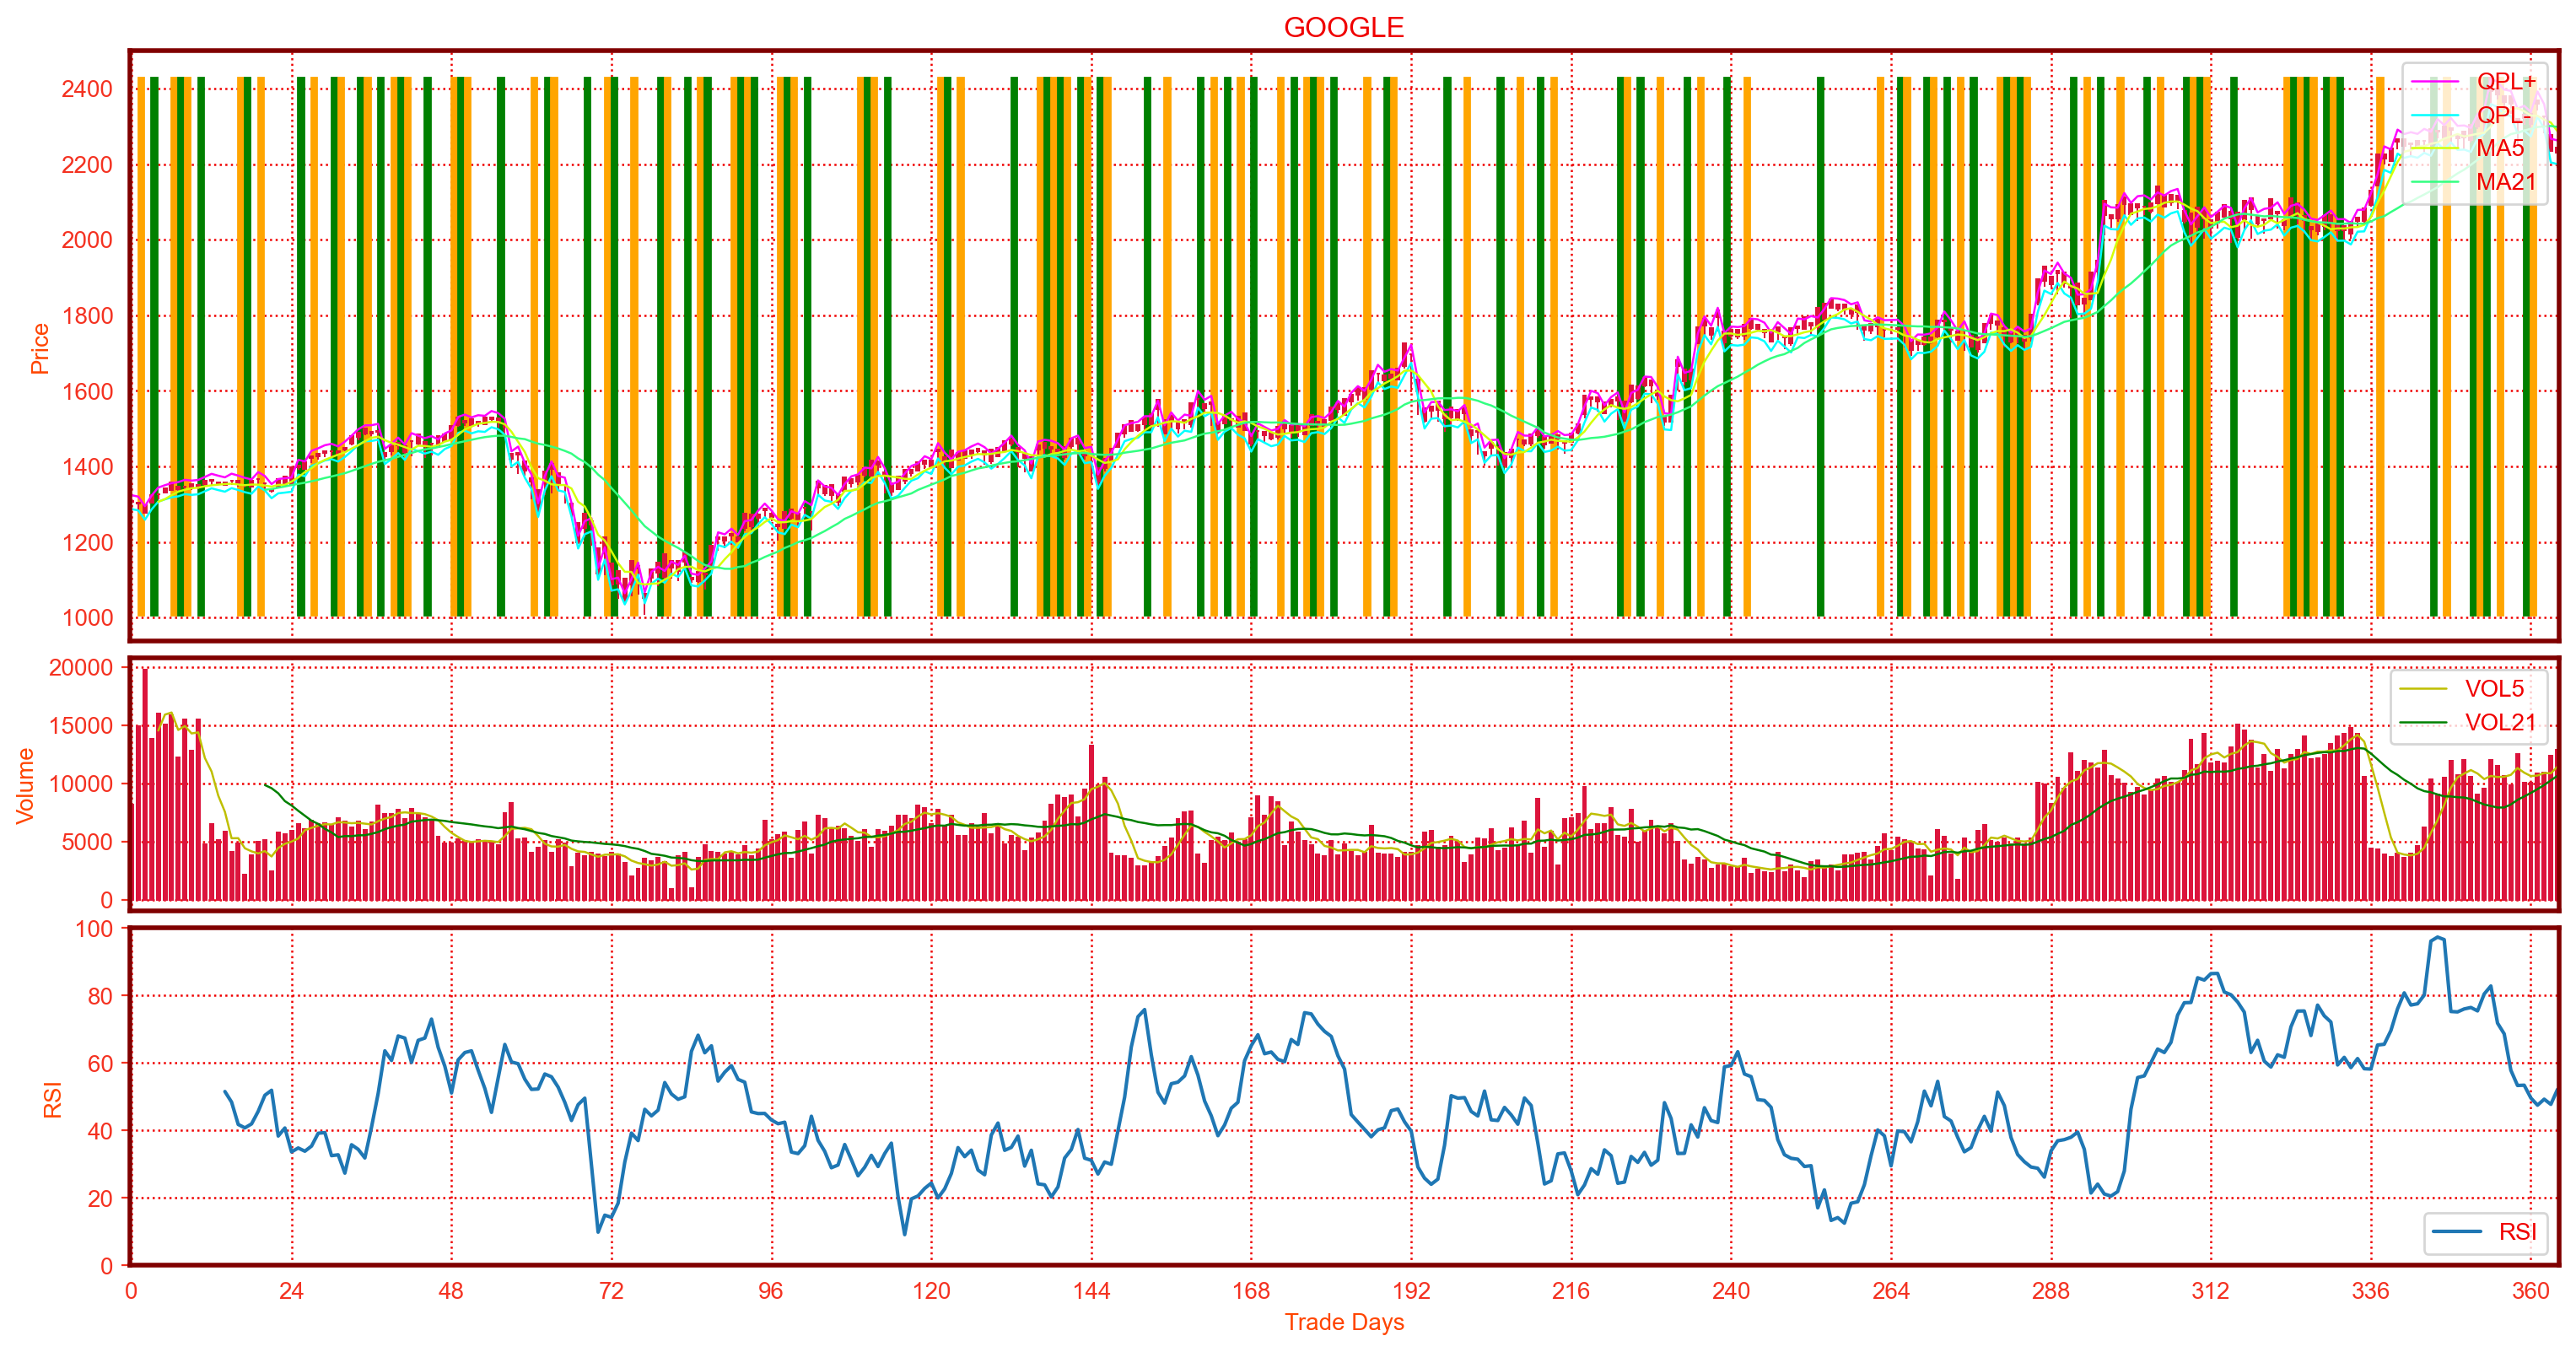

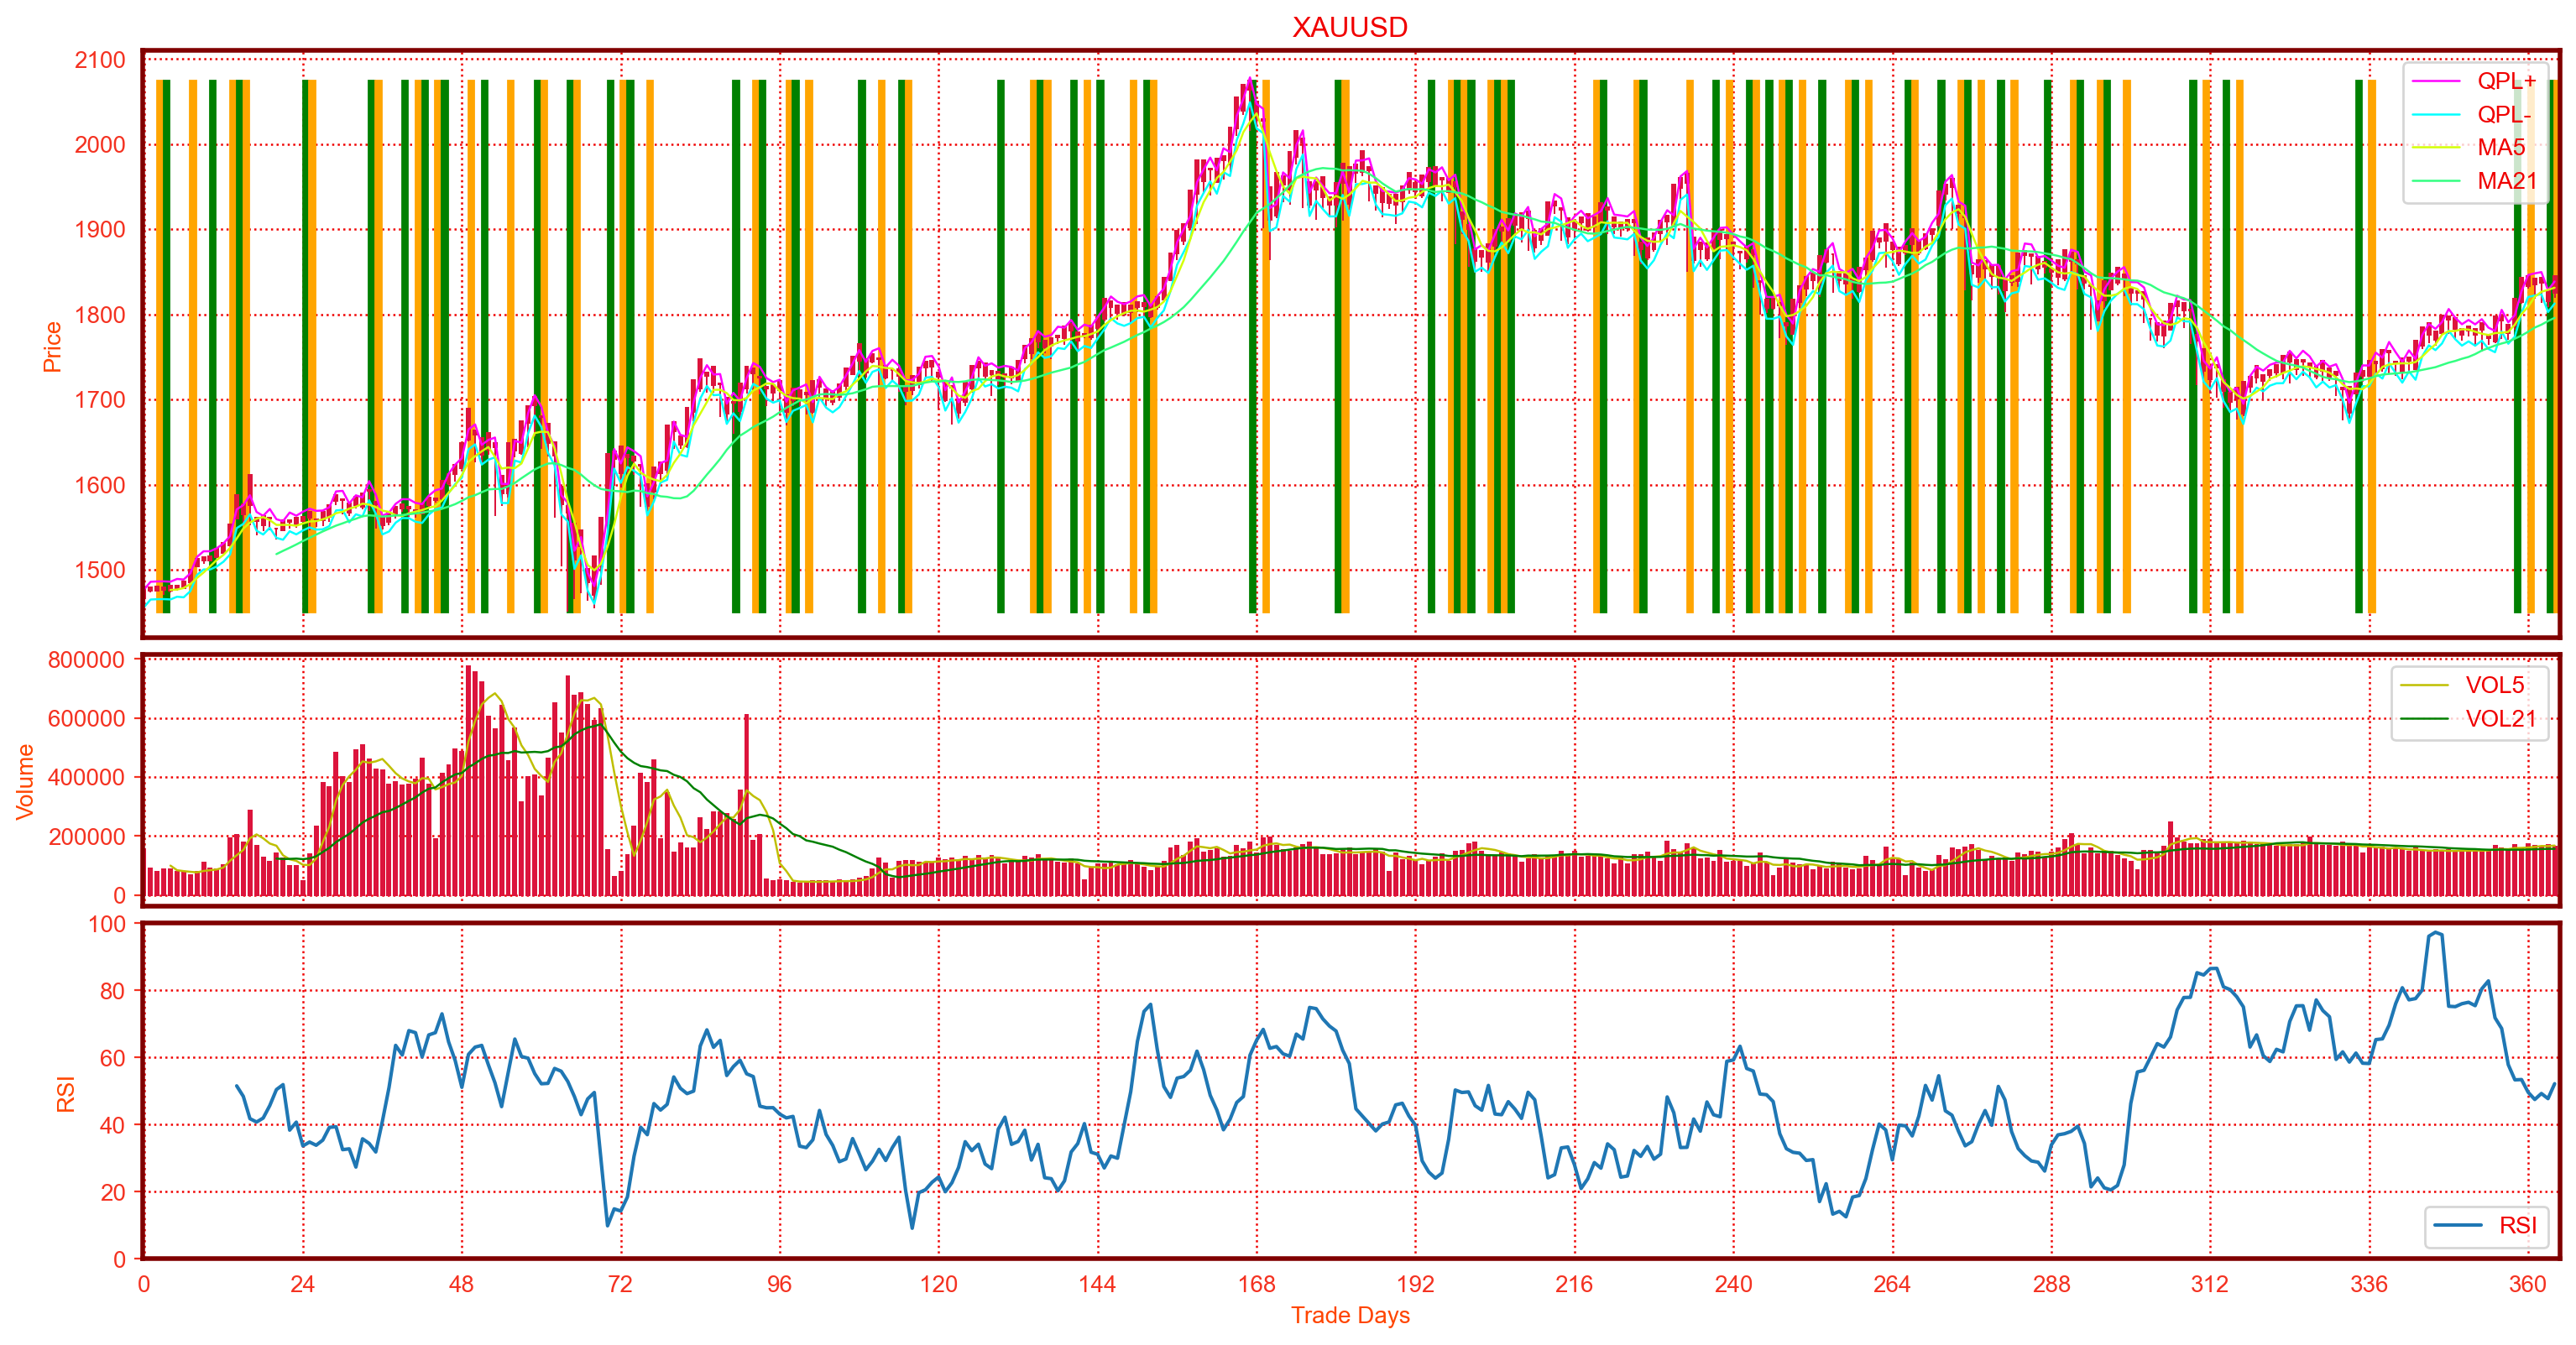

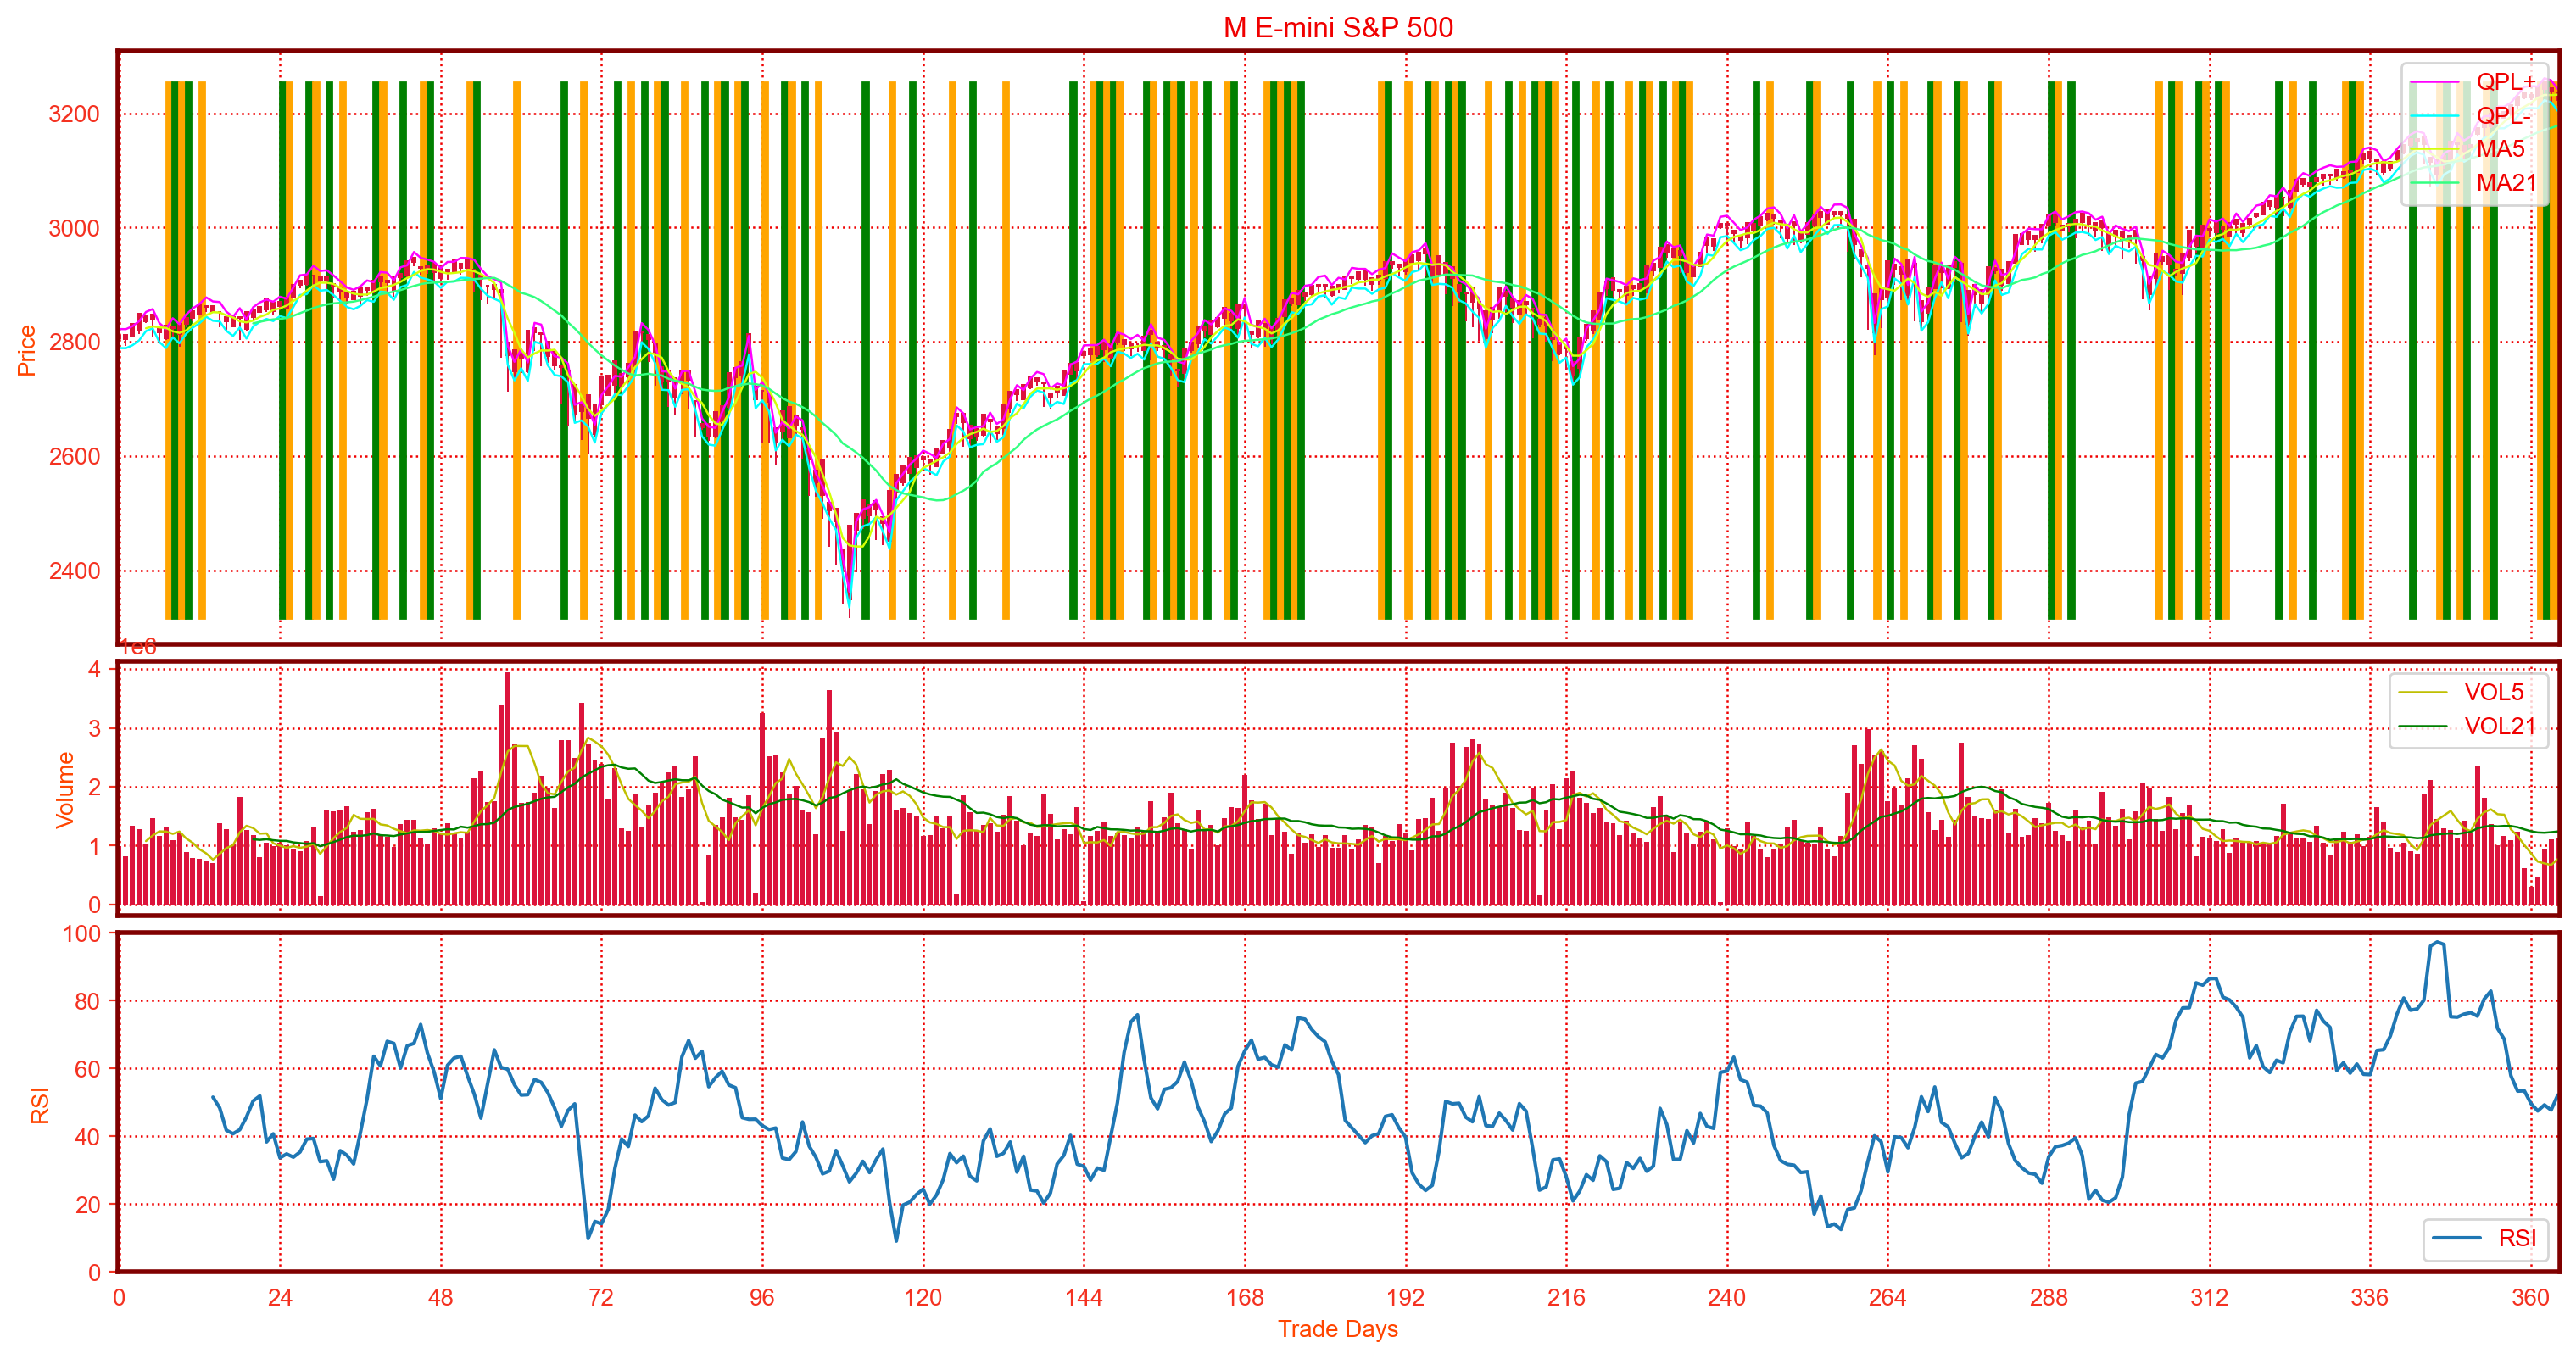

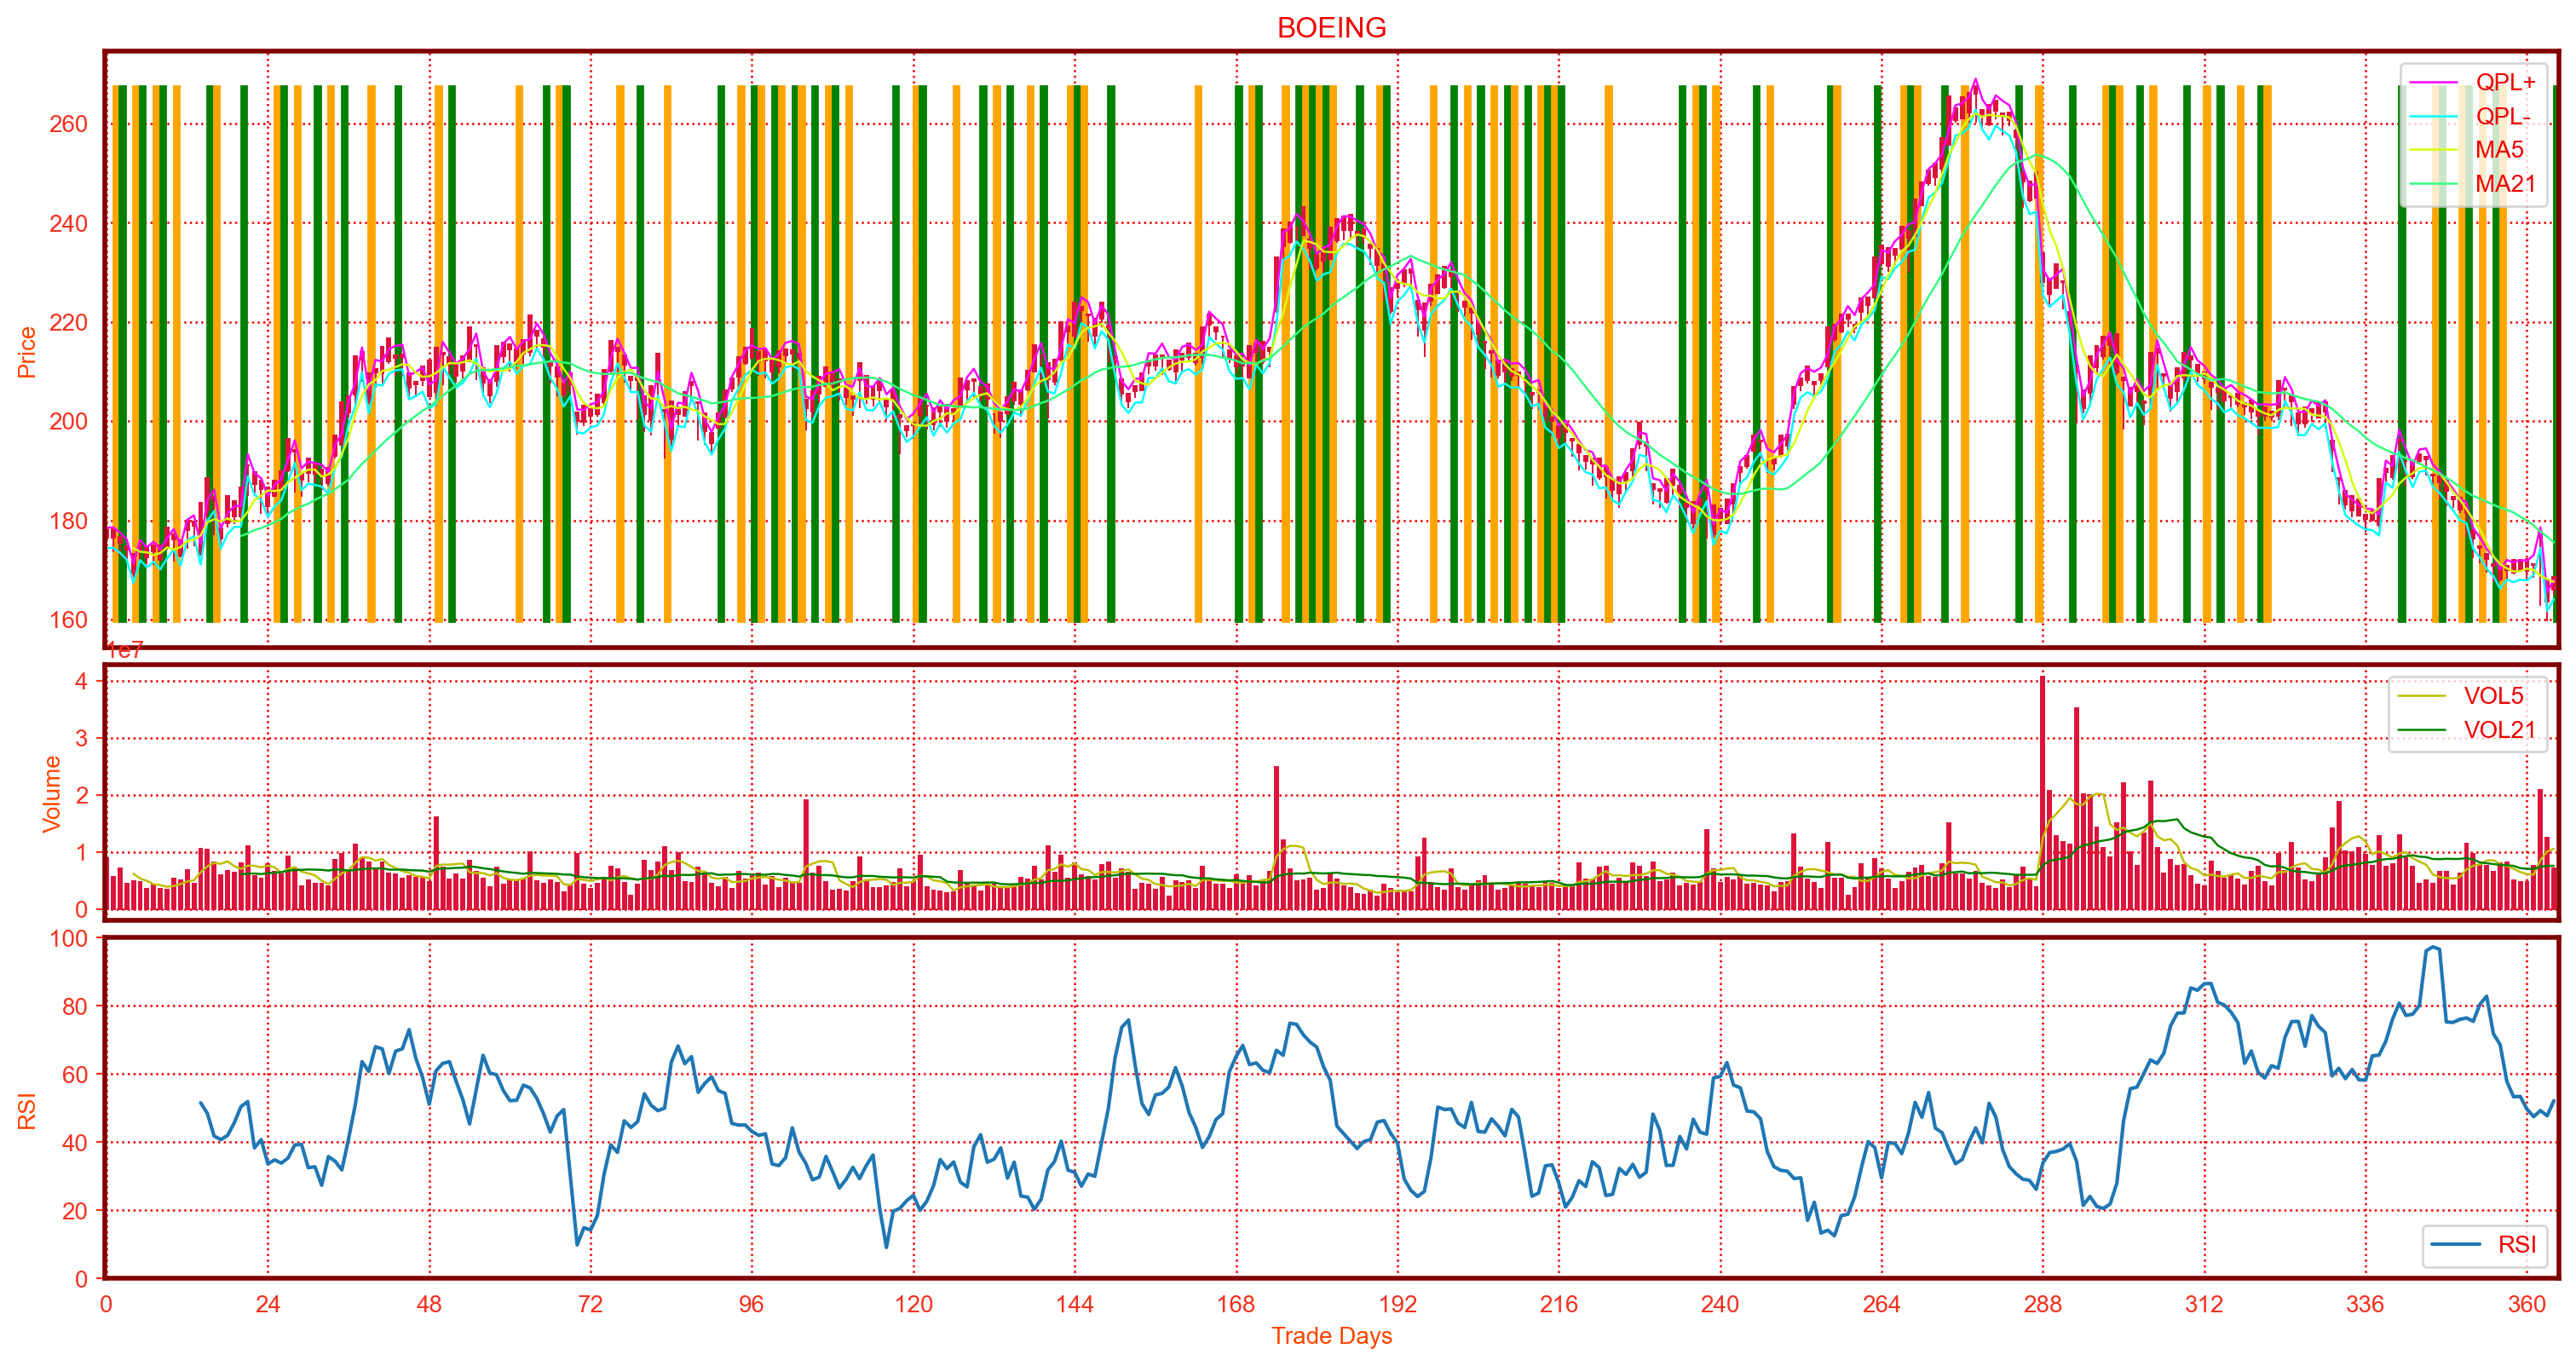

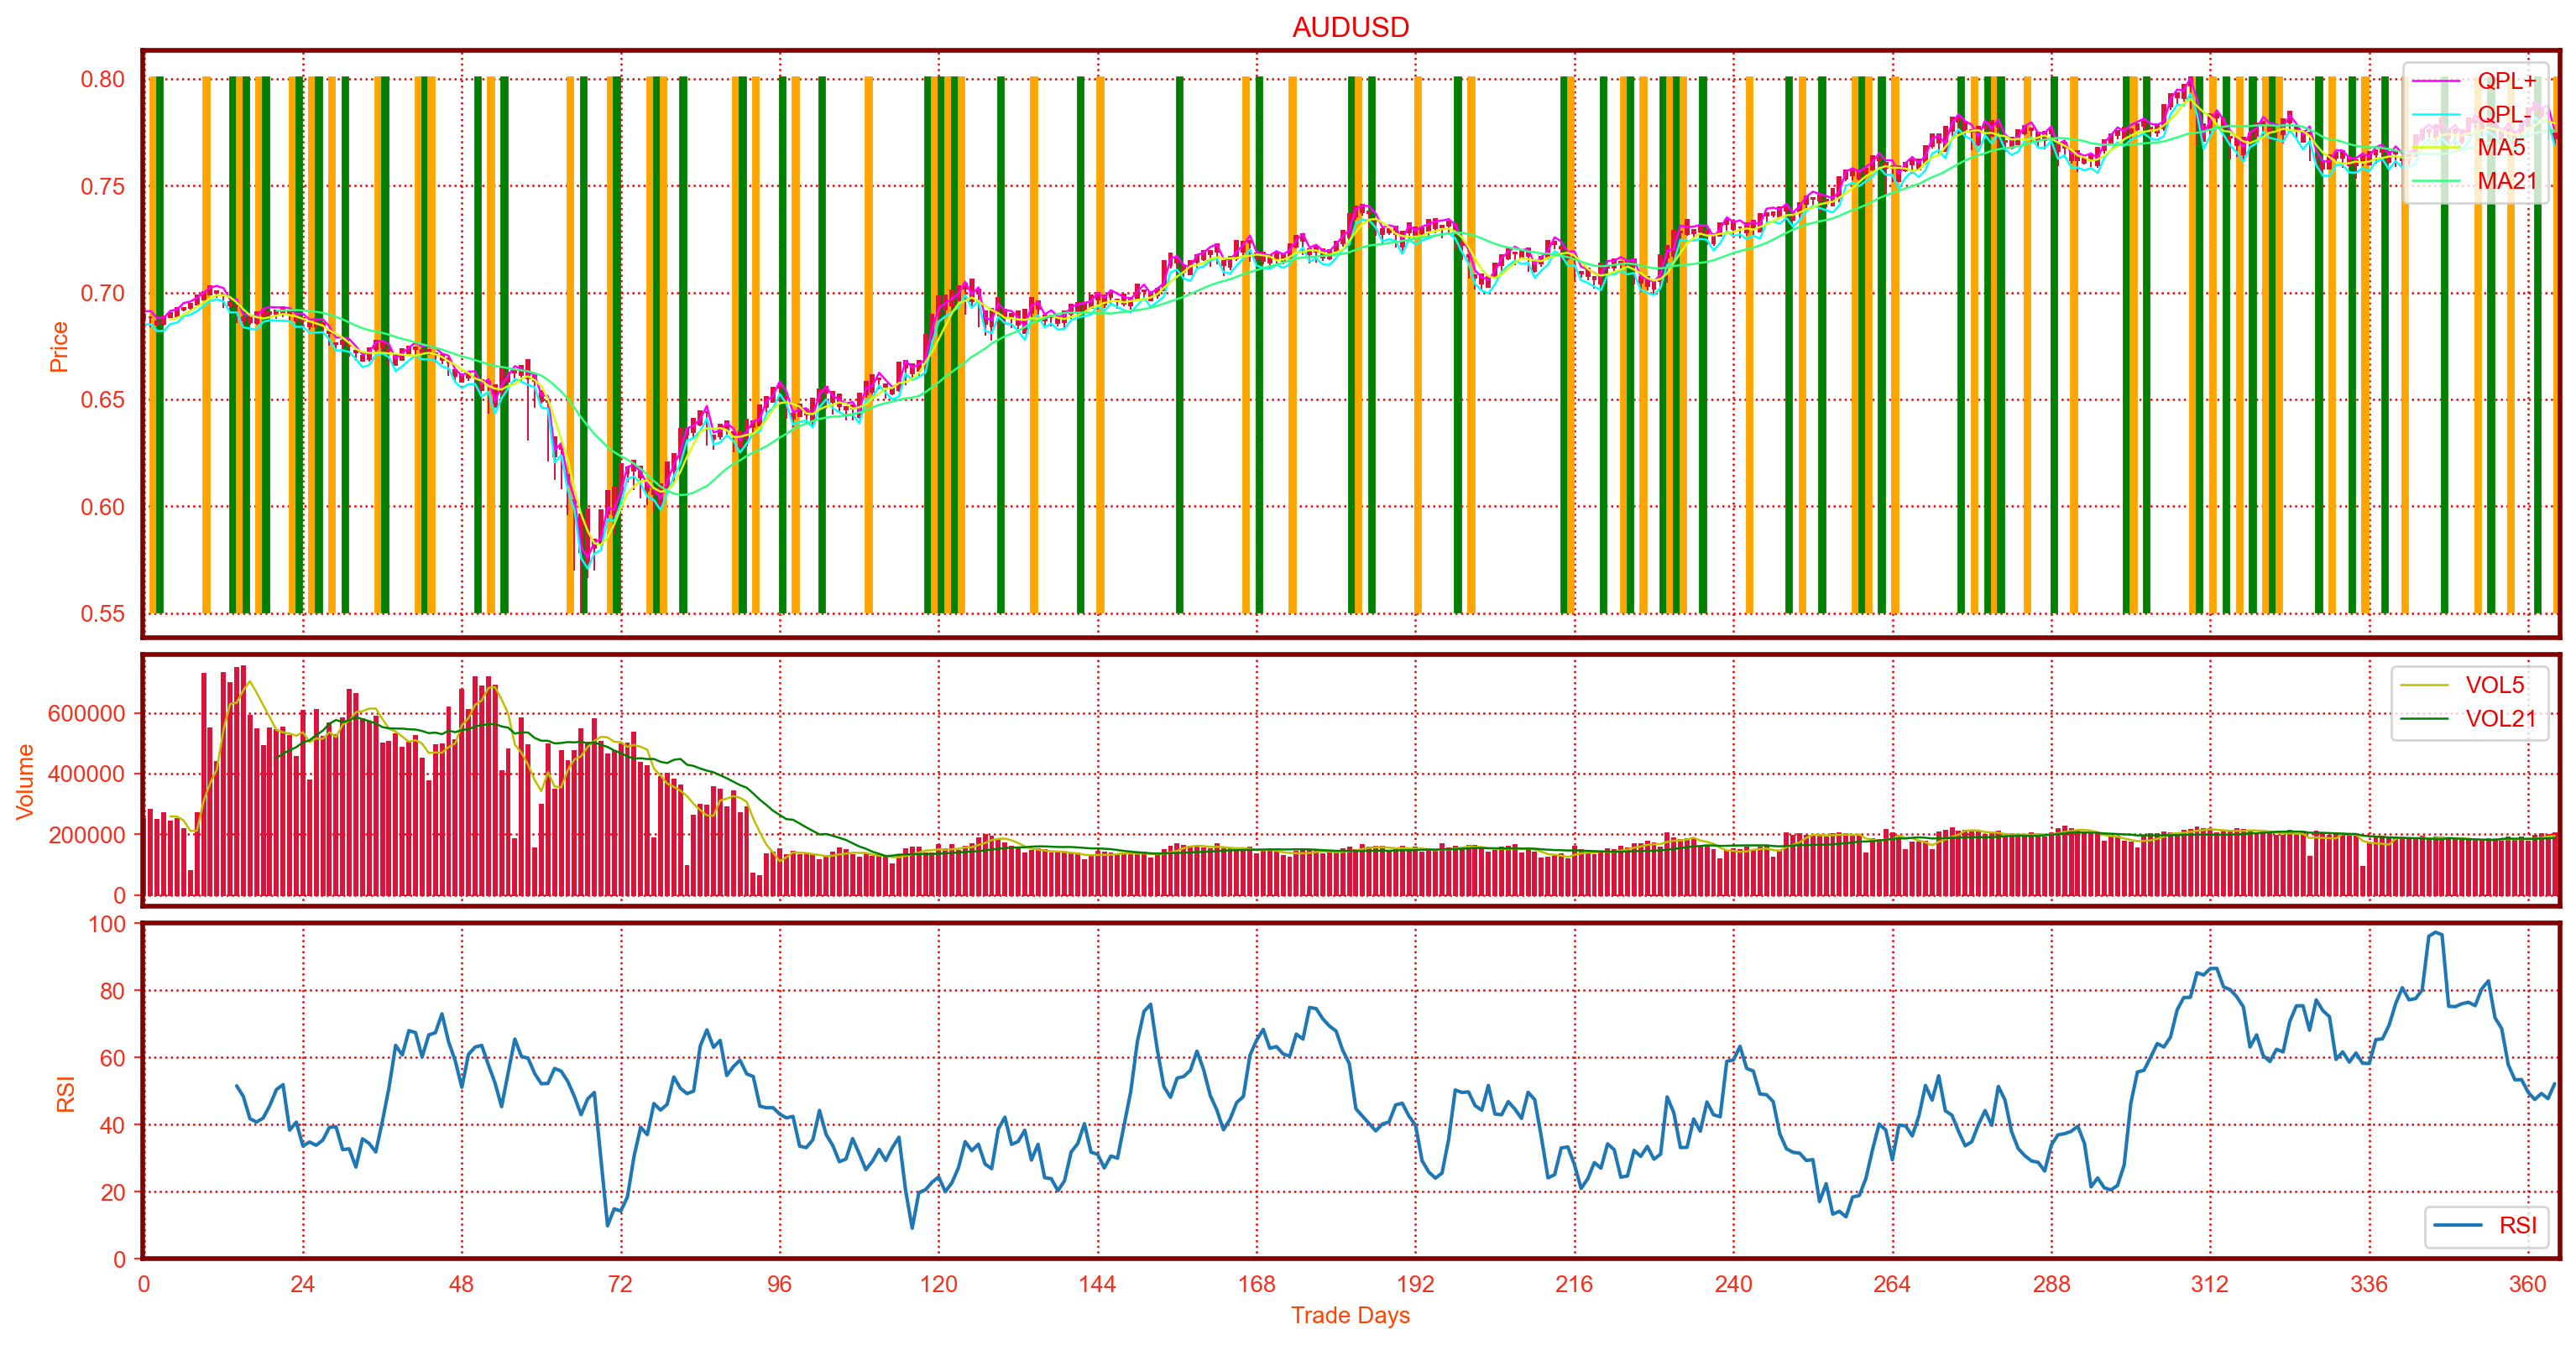

In [27]:
if __name__ == '__main__':
    # data = pd.read_csv("Data/test_data.csv")
    # data = pd.read_csv('Data/AUDUSD/source.csv')

    # Create file for recording index of strategy
    DIR = 'Results/index.txt'
    print("DIR is",DIR)
    if os.path.exists(DIR):

        # shutil.rmtree(DIR)
        os.remove(DIR)
    g = open(DIR,'w')

    for product in Products:
        if product in ['AUDUSD','USDJPY', 'XAUUSD']:
            if_forex = True
        else:
            if_forex = False
        print("-------Training Model for %s --------" %product)
        data = pd.read_csv('Data/'+product+'/source.csv')[base].iloc[::-1].reset_index().iloc[:,1::]
        data = Preprocessor(data).Get_preprocessed_data()
        # print(data)
        INPUT_DIMS = [len(data.columns) + 3]

        env = Environment(data)
        GAMMA,BATCH_SIZE,LR = GAMMAs[Products.index(product)],BATCH_SIZEs[Products.index(product)],LRs[Products.index(product)]
        agent = Agent(gamma=GAMMA, epsilon=EPSILON, batch_size=BATCH_SIZE, n_actions=N_ACTIONS, eps_end=EPS_END, input_dims=INPUT_DIMS, lr=LR,
                      fc1_dims=fc1_dims, fc2_dims=fc2_dims,fc3_dims=fc3_dims)

        loss_history = []

        best_profit = -1e7
        best_log = 'Results/log/best_log_' + product + '.txt'
        best_balances = []
        for i in range(NGAMES):

            flag = True
            balances = []

            tmp_log = 'Results/log/tmp_log_' + product + '.txt'
            if os.path.exists(tmp_log):
                os.remove(tmp_log )
            file = open(tmp_log, 'w')

            done = False
            observation = env.reset()
            while not done:
                action = agent.choose_action(observation)
                observation_, reward, done = env.step(action,file,write = flag)
                if flag:
                    balances.append(env.balance)
                agent.store_transition(observation, action, reward, observation_, done)
                agent.learn()
                observation = observation_

            loss_history.append(agent.loss)

            print('episode', i, ': profits %.2f' % env.total_profit,'MSE loss %.2f' % agent.loss)

            file.close()

            if env.total_profit >= best_profit: #if it is the best result ever
                shutil.copy(tmp_log, best_log)
                best_balances = balances
                best_profit = env.total_profit

        os.remove(tmp_log) #delete the temp log file

        g.write(product+":\n")
        g.write("The Total Profit is %.2f \n" % best_profit)
        g.write("The Accumulative Return Rate is the last trade day is %.2f" % (100* ((best_balances[-1] - 1e7) / 1e7)) + '% \n')
        g.write("The Maximum Return Rate is  is %.2f" % (100 * ((max(best_balances) - 1e7) / 1e7)) + '% \n')
        g.write("The Minimum Return Rate is  is %.2f" % (100 * ((min(best_balances) - 1e7) / 1e7)) + '% \n')
        print("The Accumulative Return Rate for "+product+ " is %.2f" % (100* ((best_balances[-1] - 1e7) / 1e7)) + '% \n')
        print("The Maximum Return Rate for "+product+ " is %.2f" % (100 * ((max(best_balances) - 1e7) / 1e7)) + '% \n')
        print("The Minimum Return Rate for "+product+ " is %.2f" % (100 * ((min(best_balances) - 1e7) / 1e7)) + '% \n')
        # g.write("The Max Draw Down rate for %s is %.2f " %(product, 100*MaxDrawdown(best_balances)) + '% \n')
        # g.write("The Sharpe Ratio is %.2f " % (100*SharpeRatio(best_balances)) + '% \n')
        g.write('\n')

        #Plot each Transaction on the Kline
        draw_transaction(product)

        #store into dictionary
        dic[product].append(loss_history)
        dic[product].append(best_balances)

    g.close()

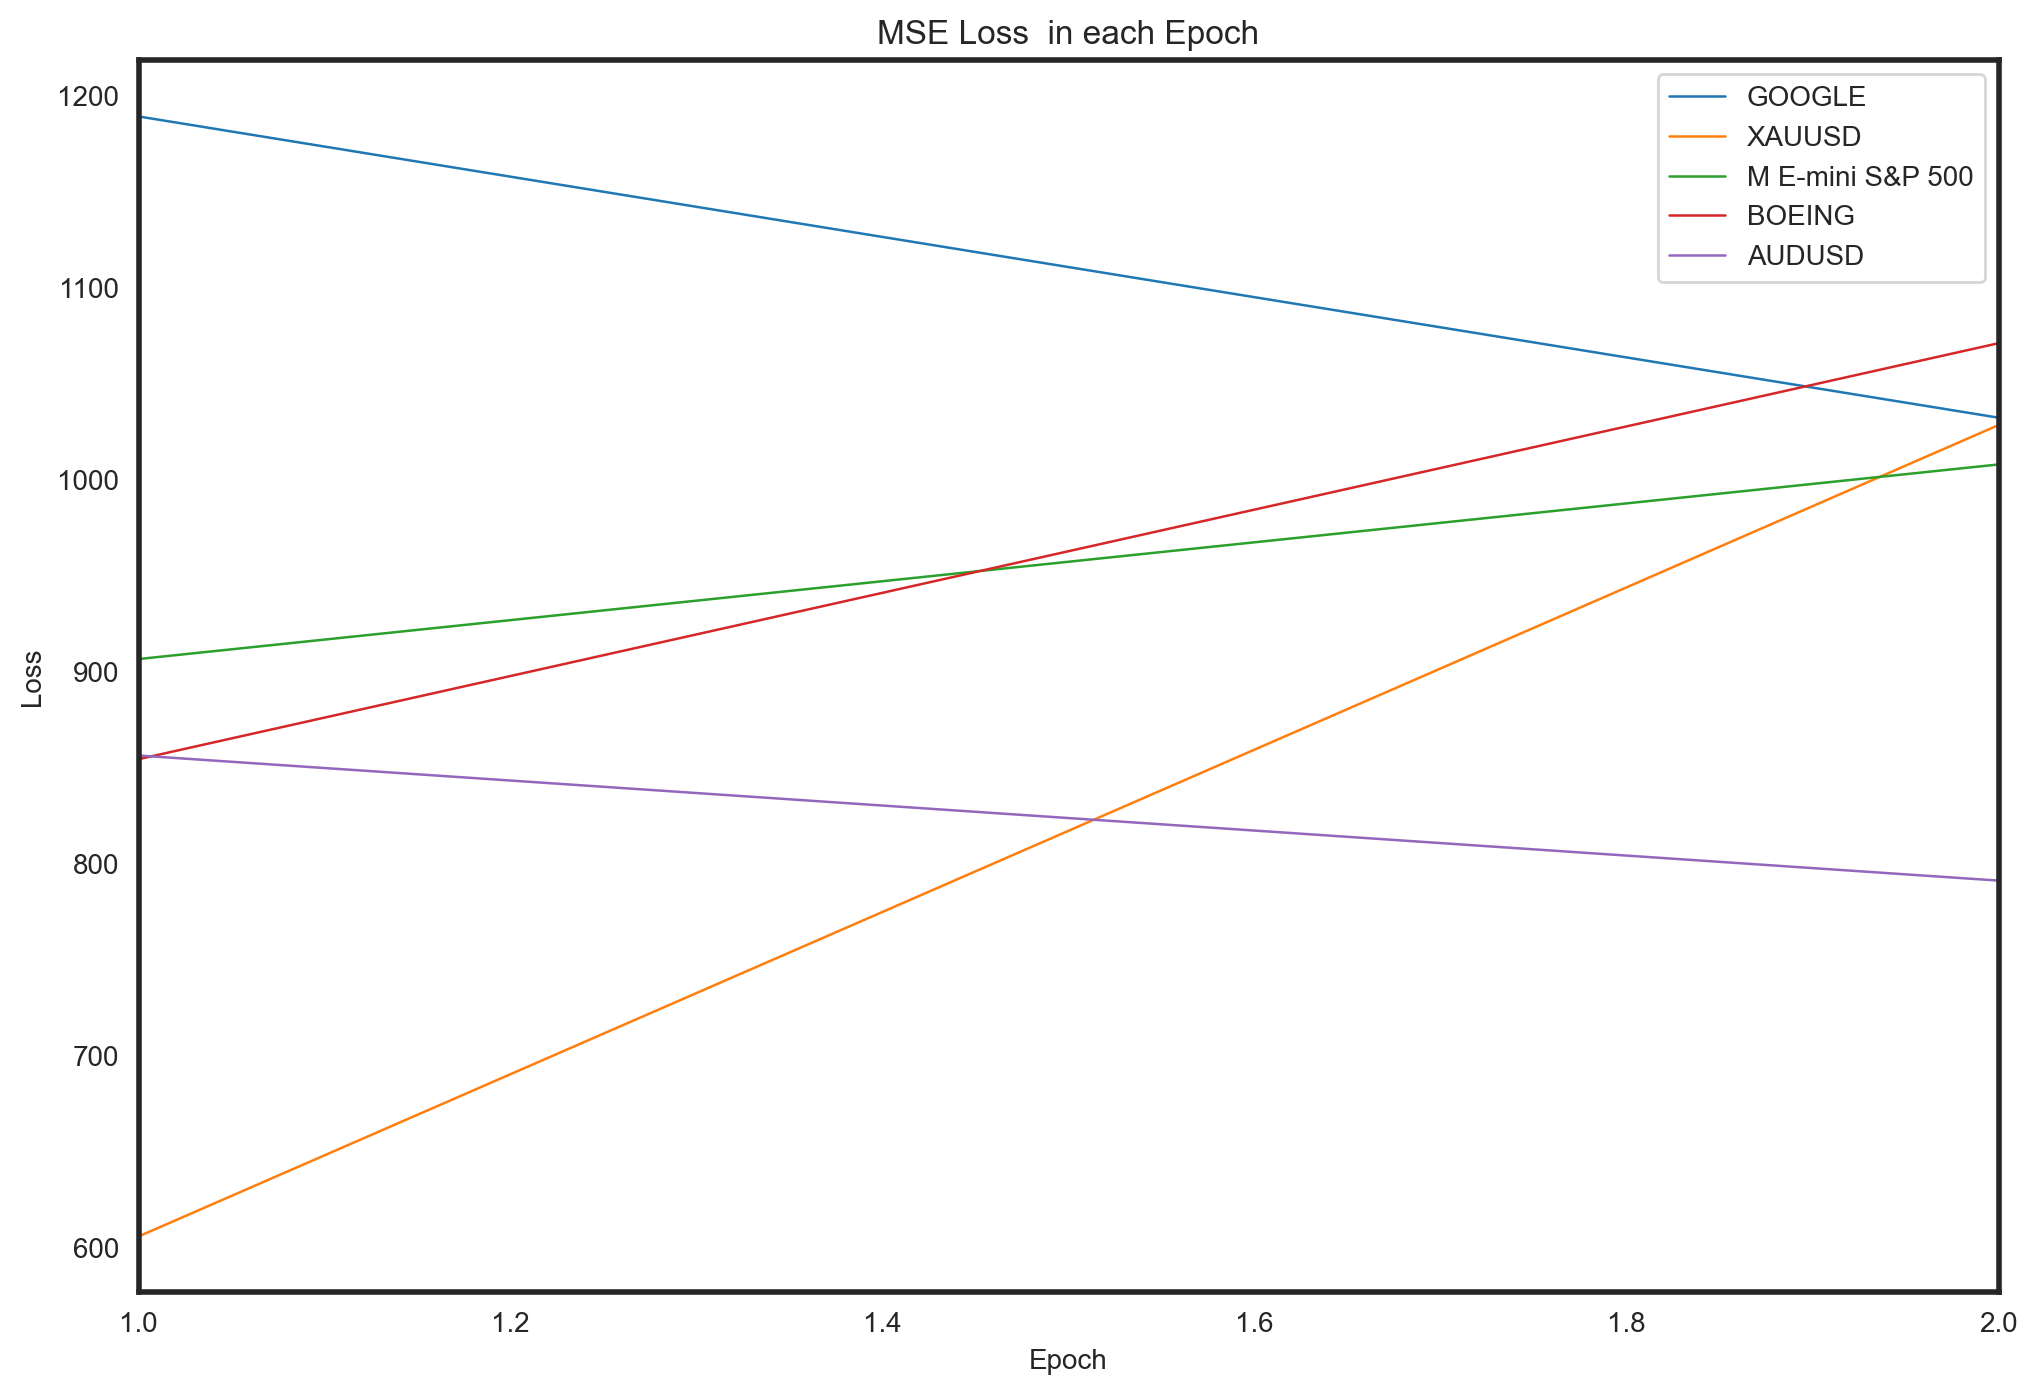

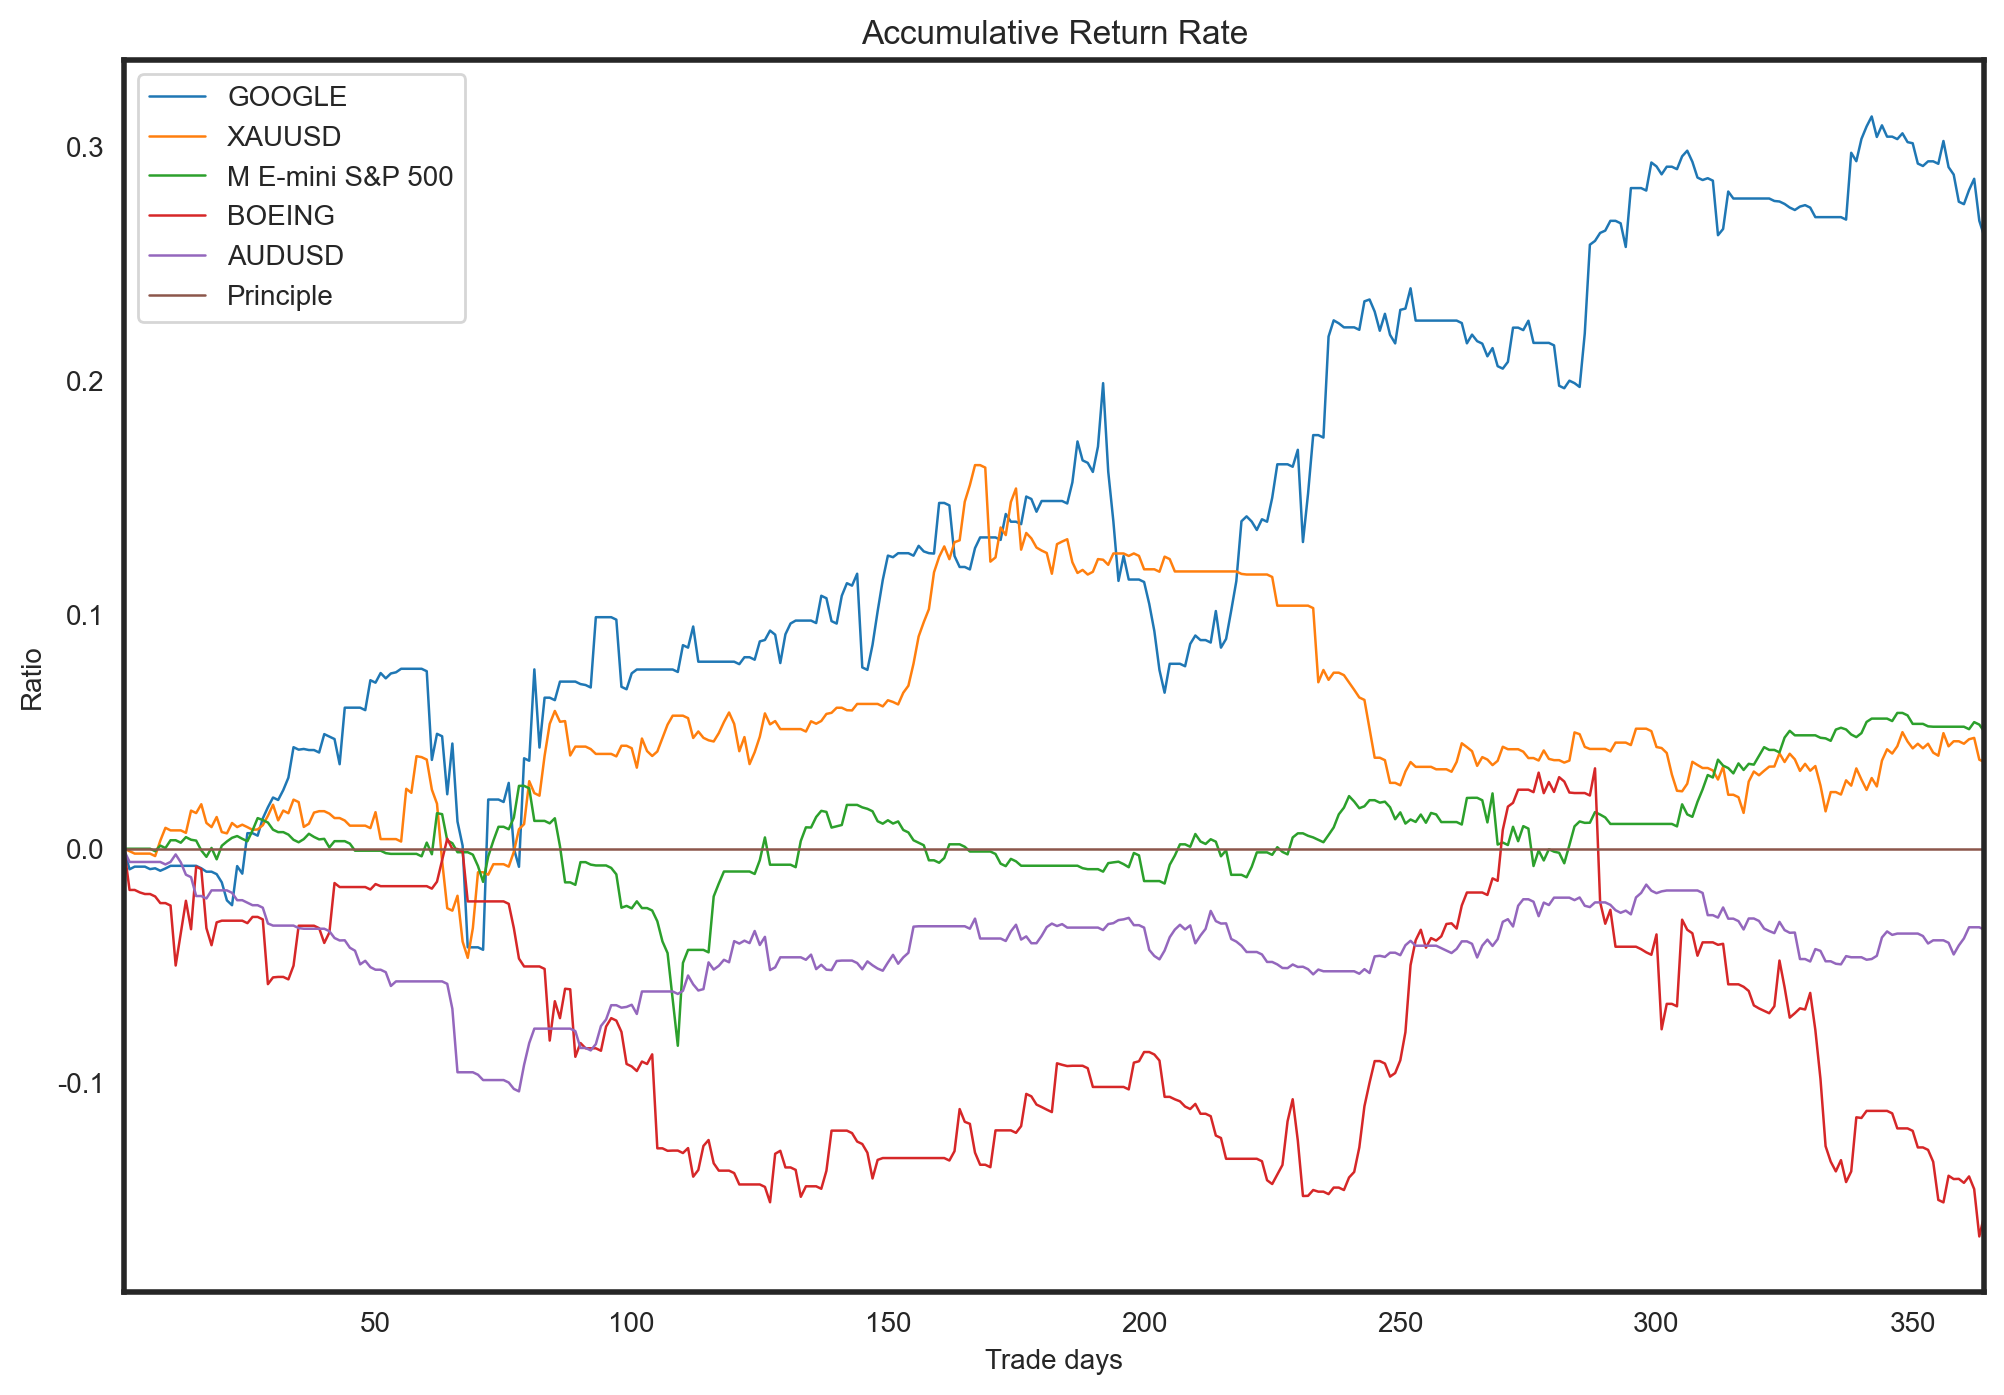

In [28]:

#Reset ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
x = [i + 1 for i in range(NGAMES)]

# Plot loss curve
plt.figure(figsize=[12, 8], dpi=200)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MSE Loss  in each Epoch')
for product in Products:
    plt.plot(x, dic[product][0], label=product)
plt.legend(loc='upper right')
plt.savefig('Results/graph/loss_curve.png', dpi=200)

# Plot balance curve for last round
x = [i + 1 for i in range(len(data)-1)]
y = [0 for i in range(len(x))]
plt.figure(figsize=[12, 8], dpi=200)
plt.xlabel('Trade days')
plt.ylabel('Ratio')
plt.title('Accumulative Return Rate')
for product in Products:
    plt.plot(x, [(i-1e7)/1e7 for i in dic[product][1]], label=product)
plt.plot(x,y,label='Principle')
plt.legend(loc='upper left')
plt.savefig('Results/graph/balance_curve.png', dpi=200)

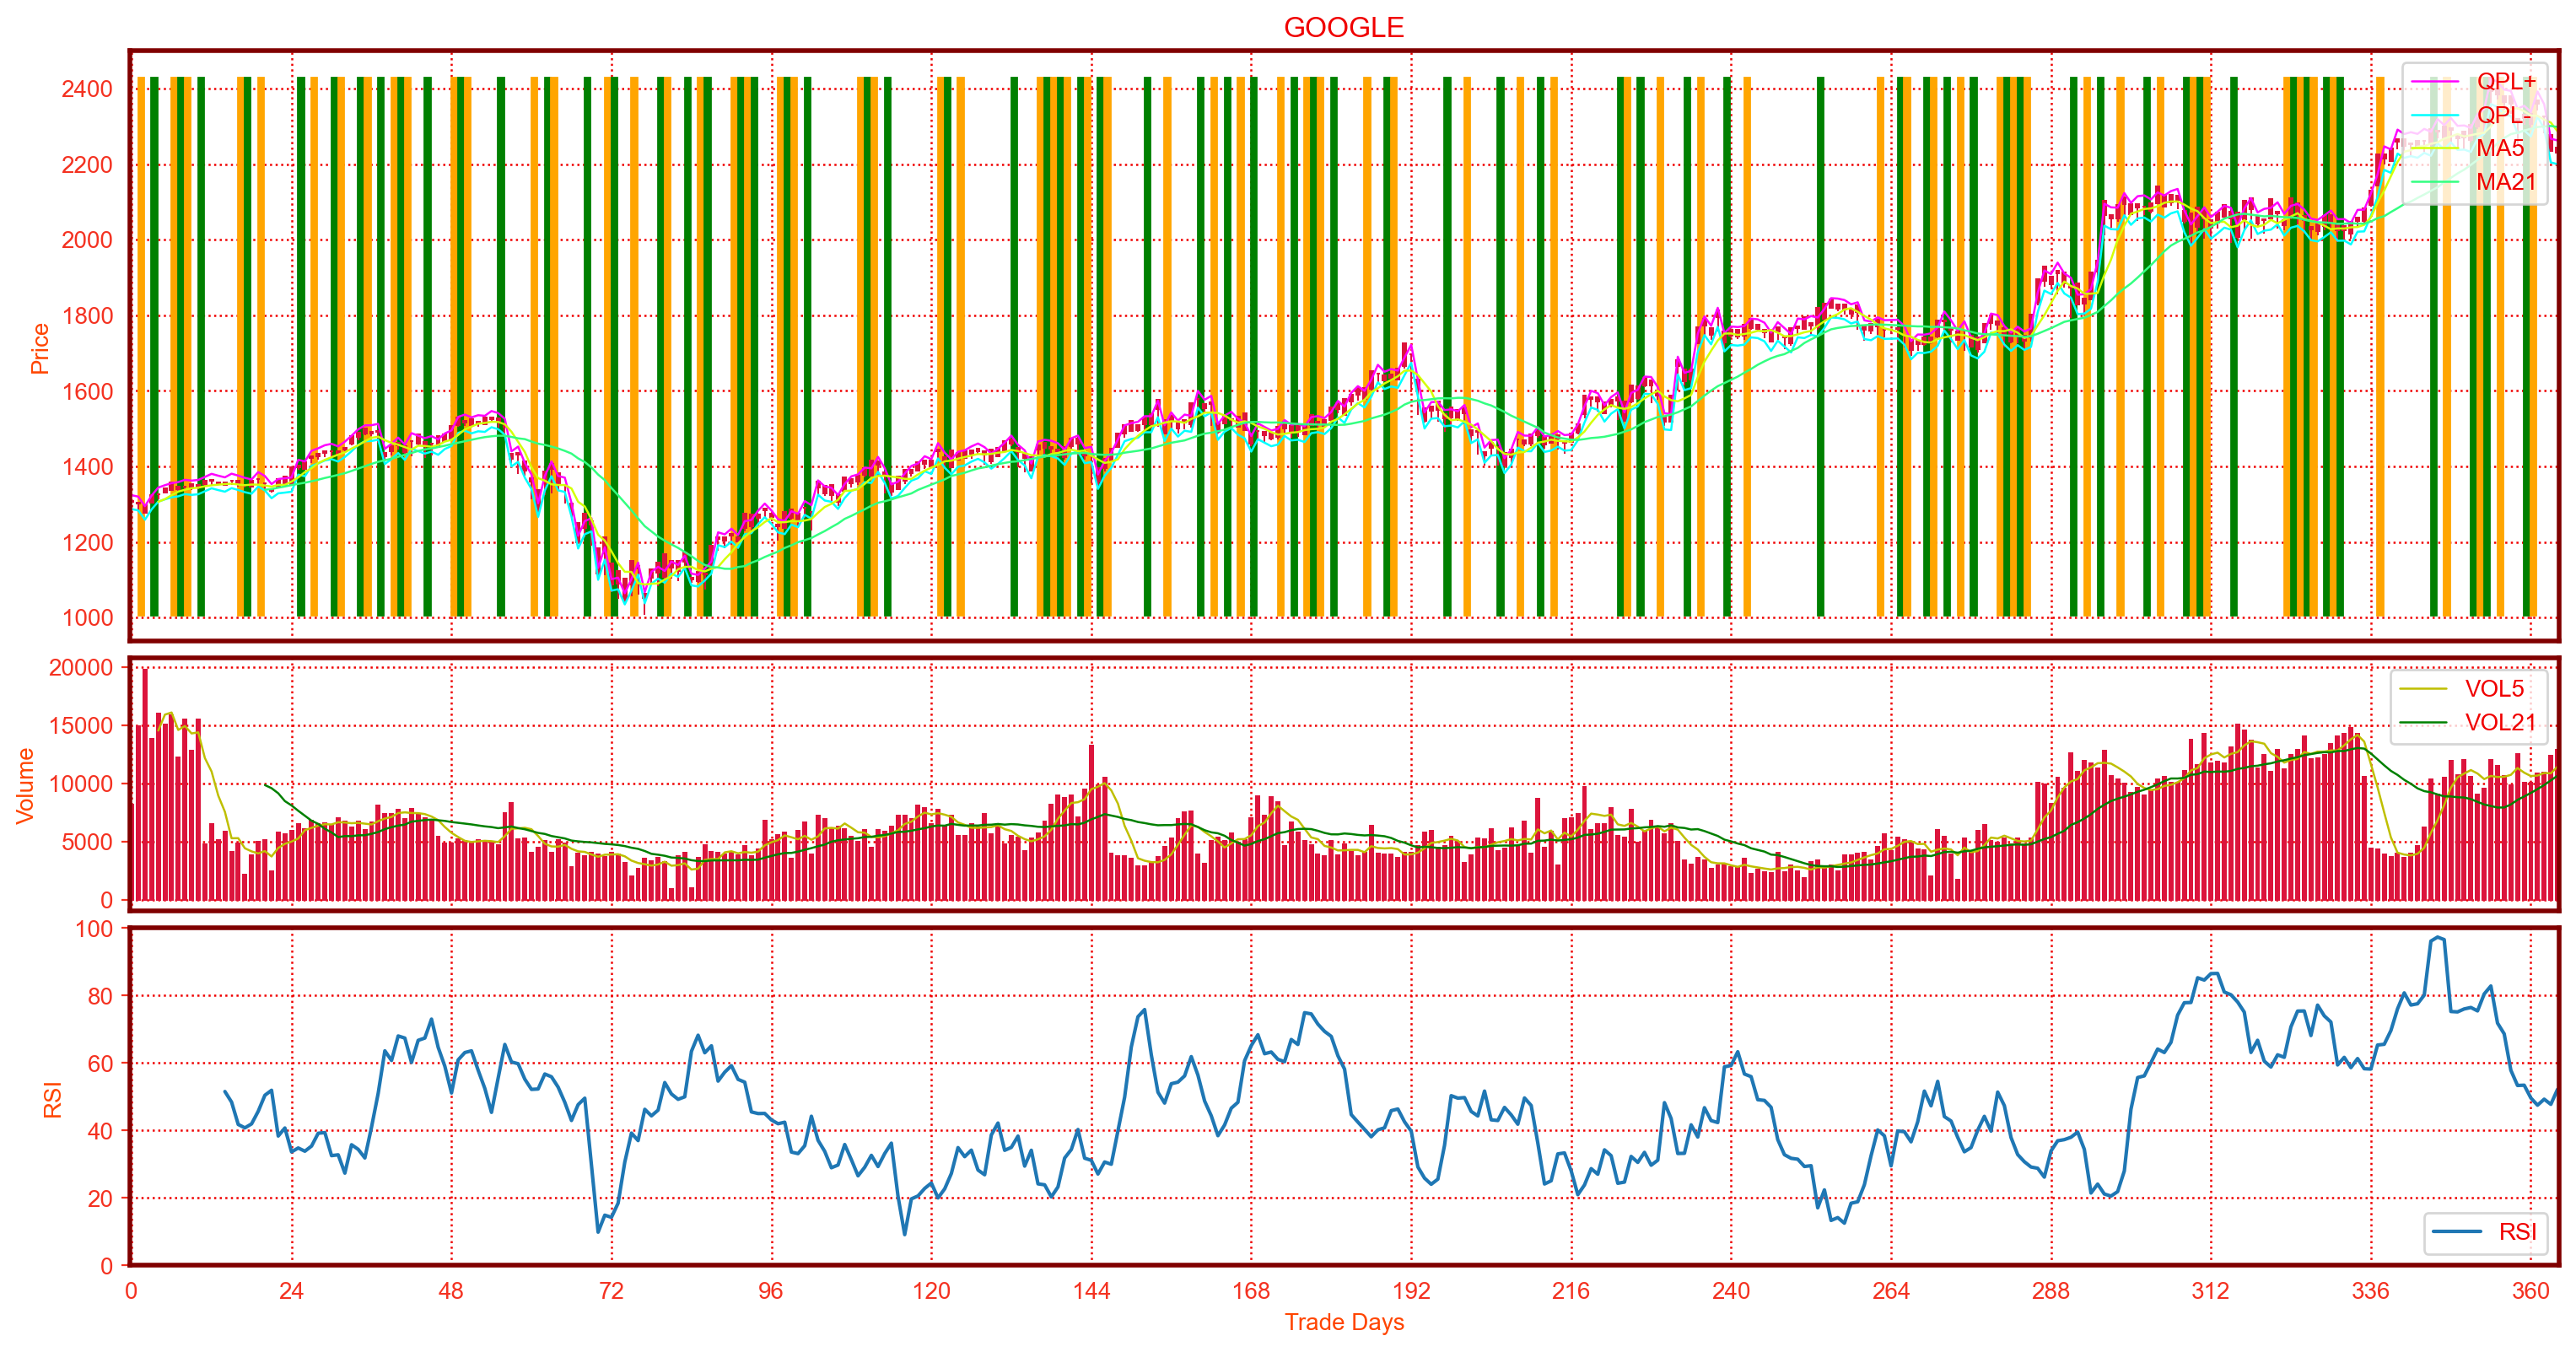

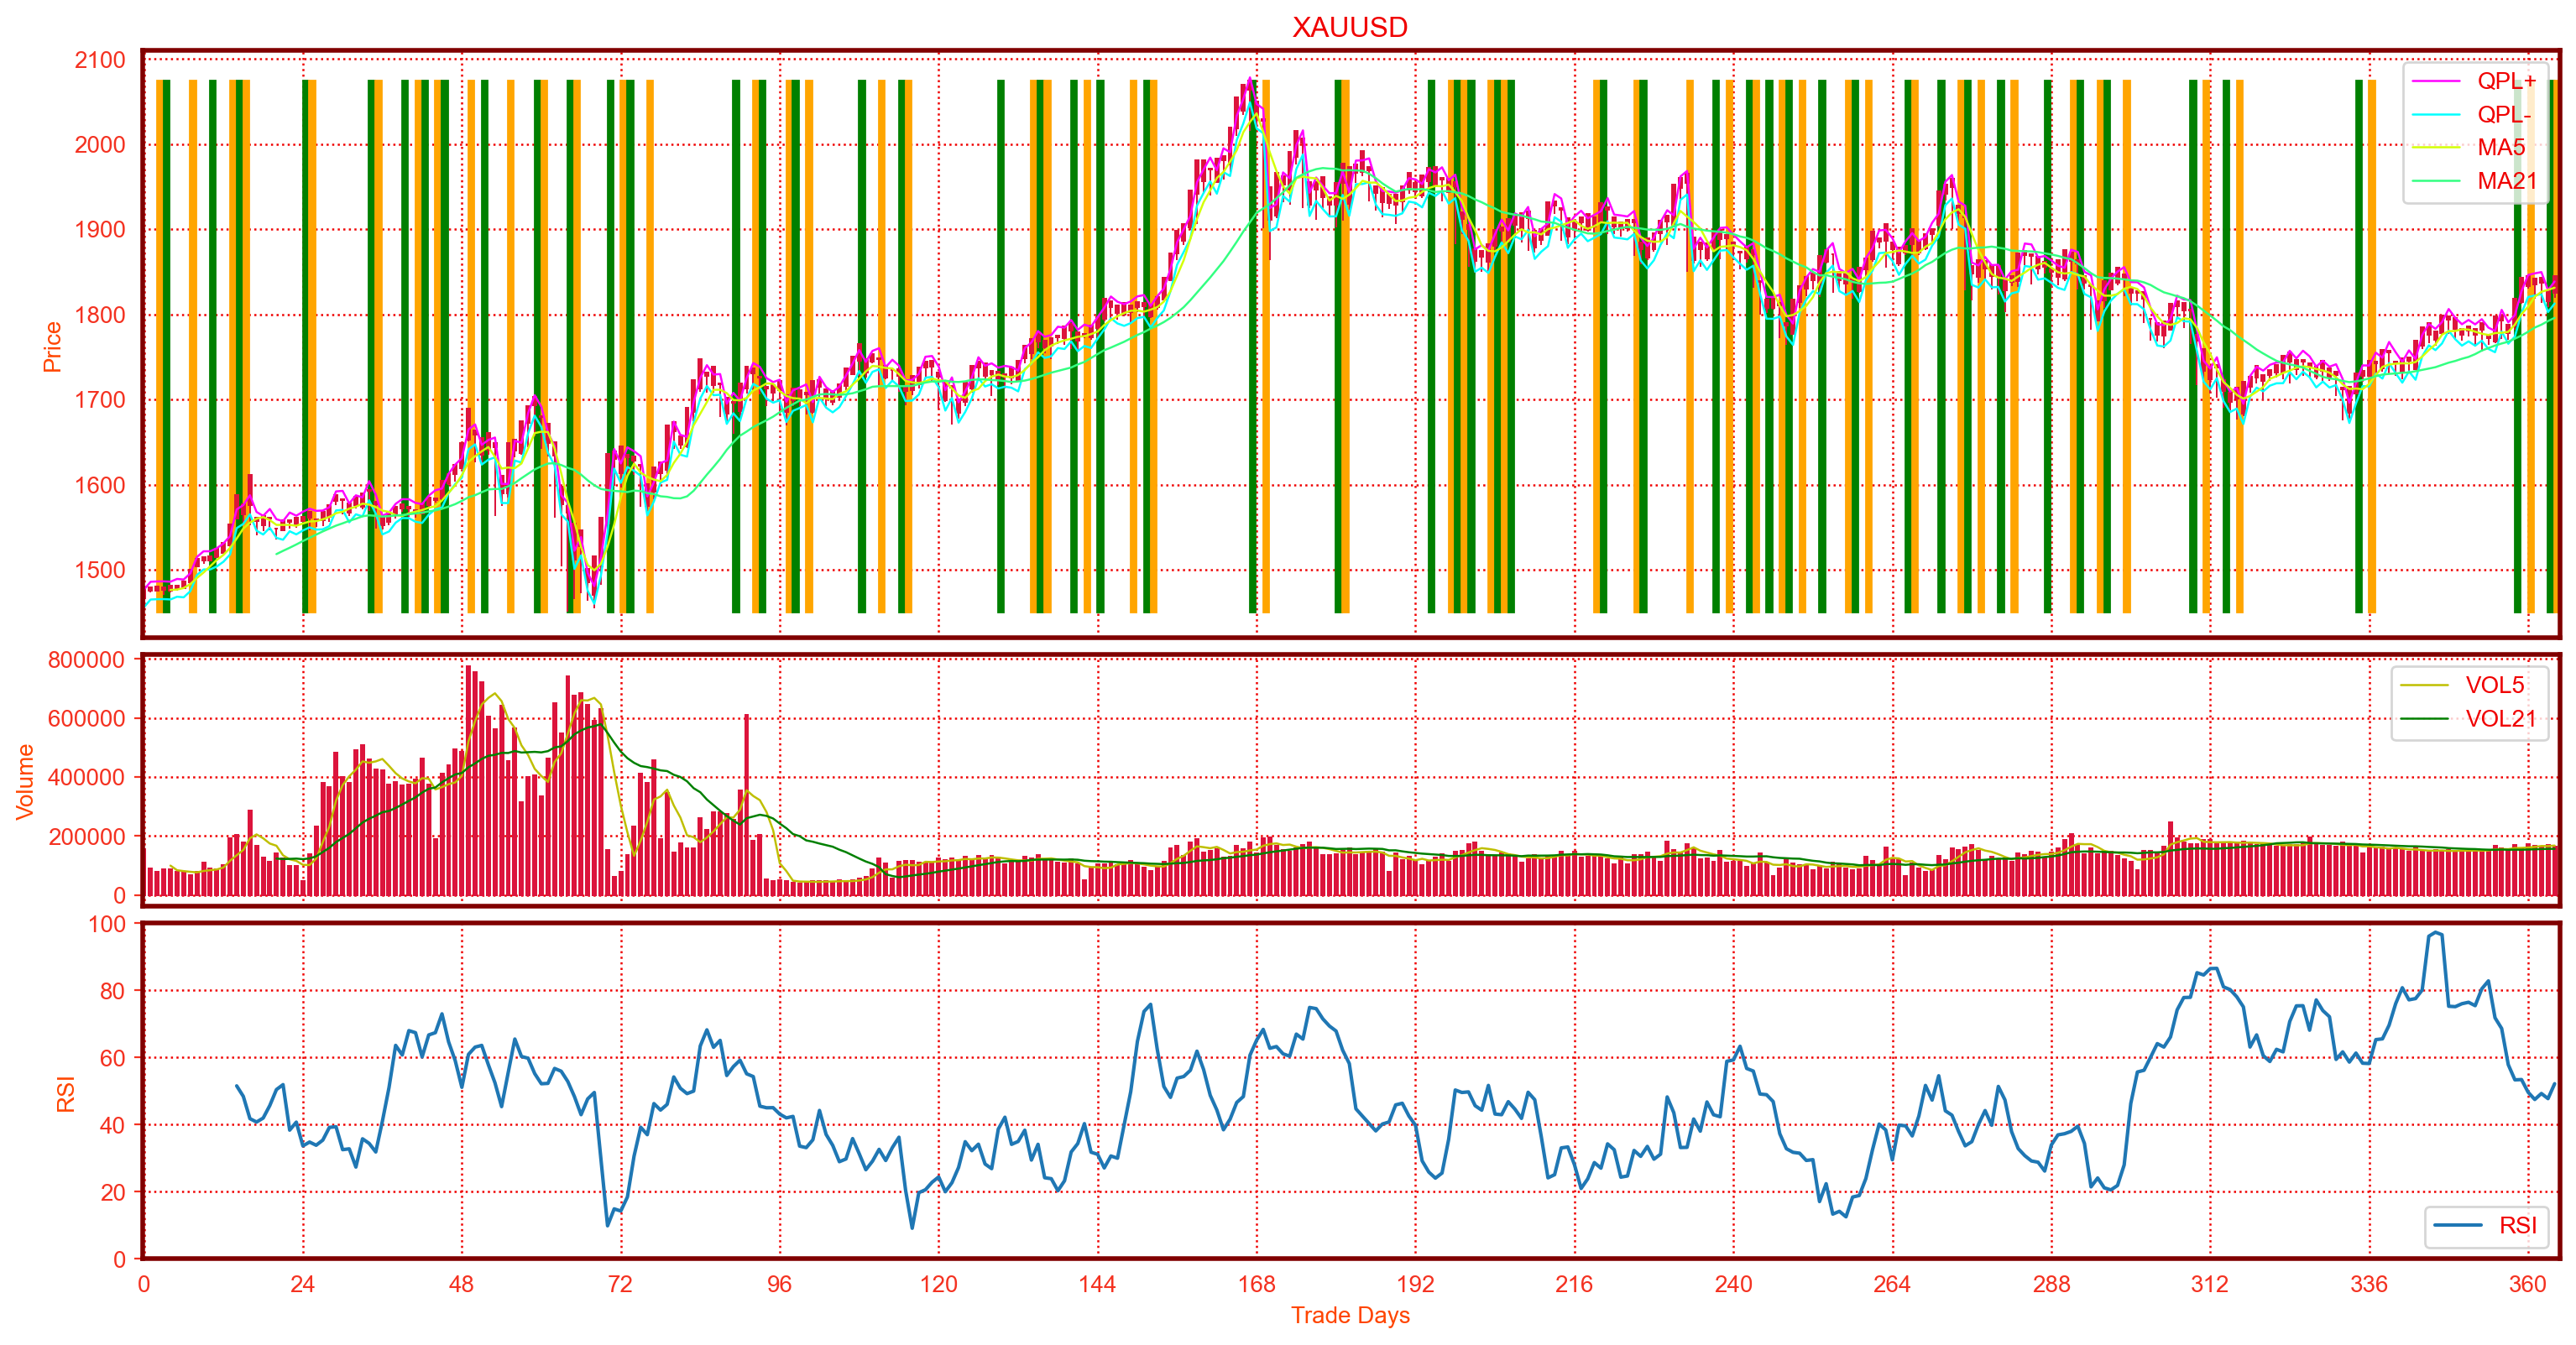

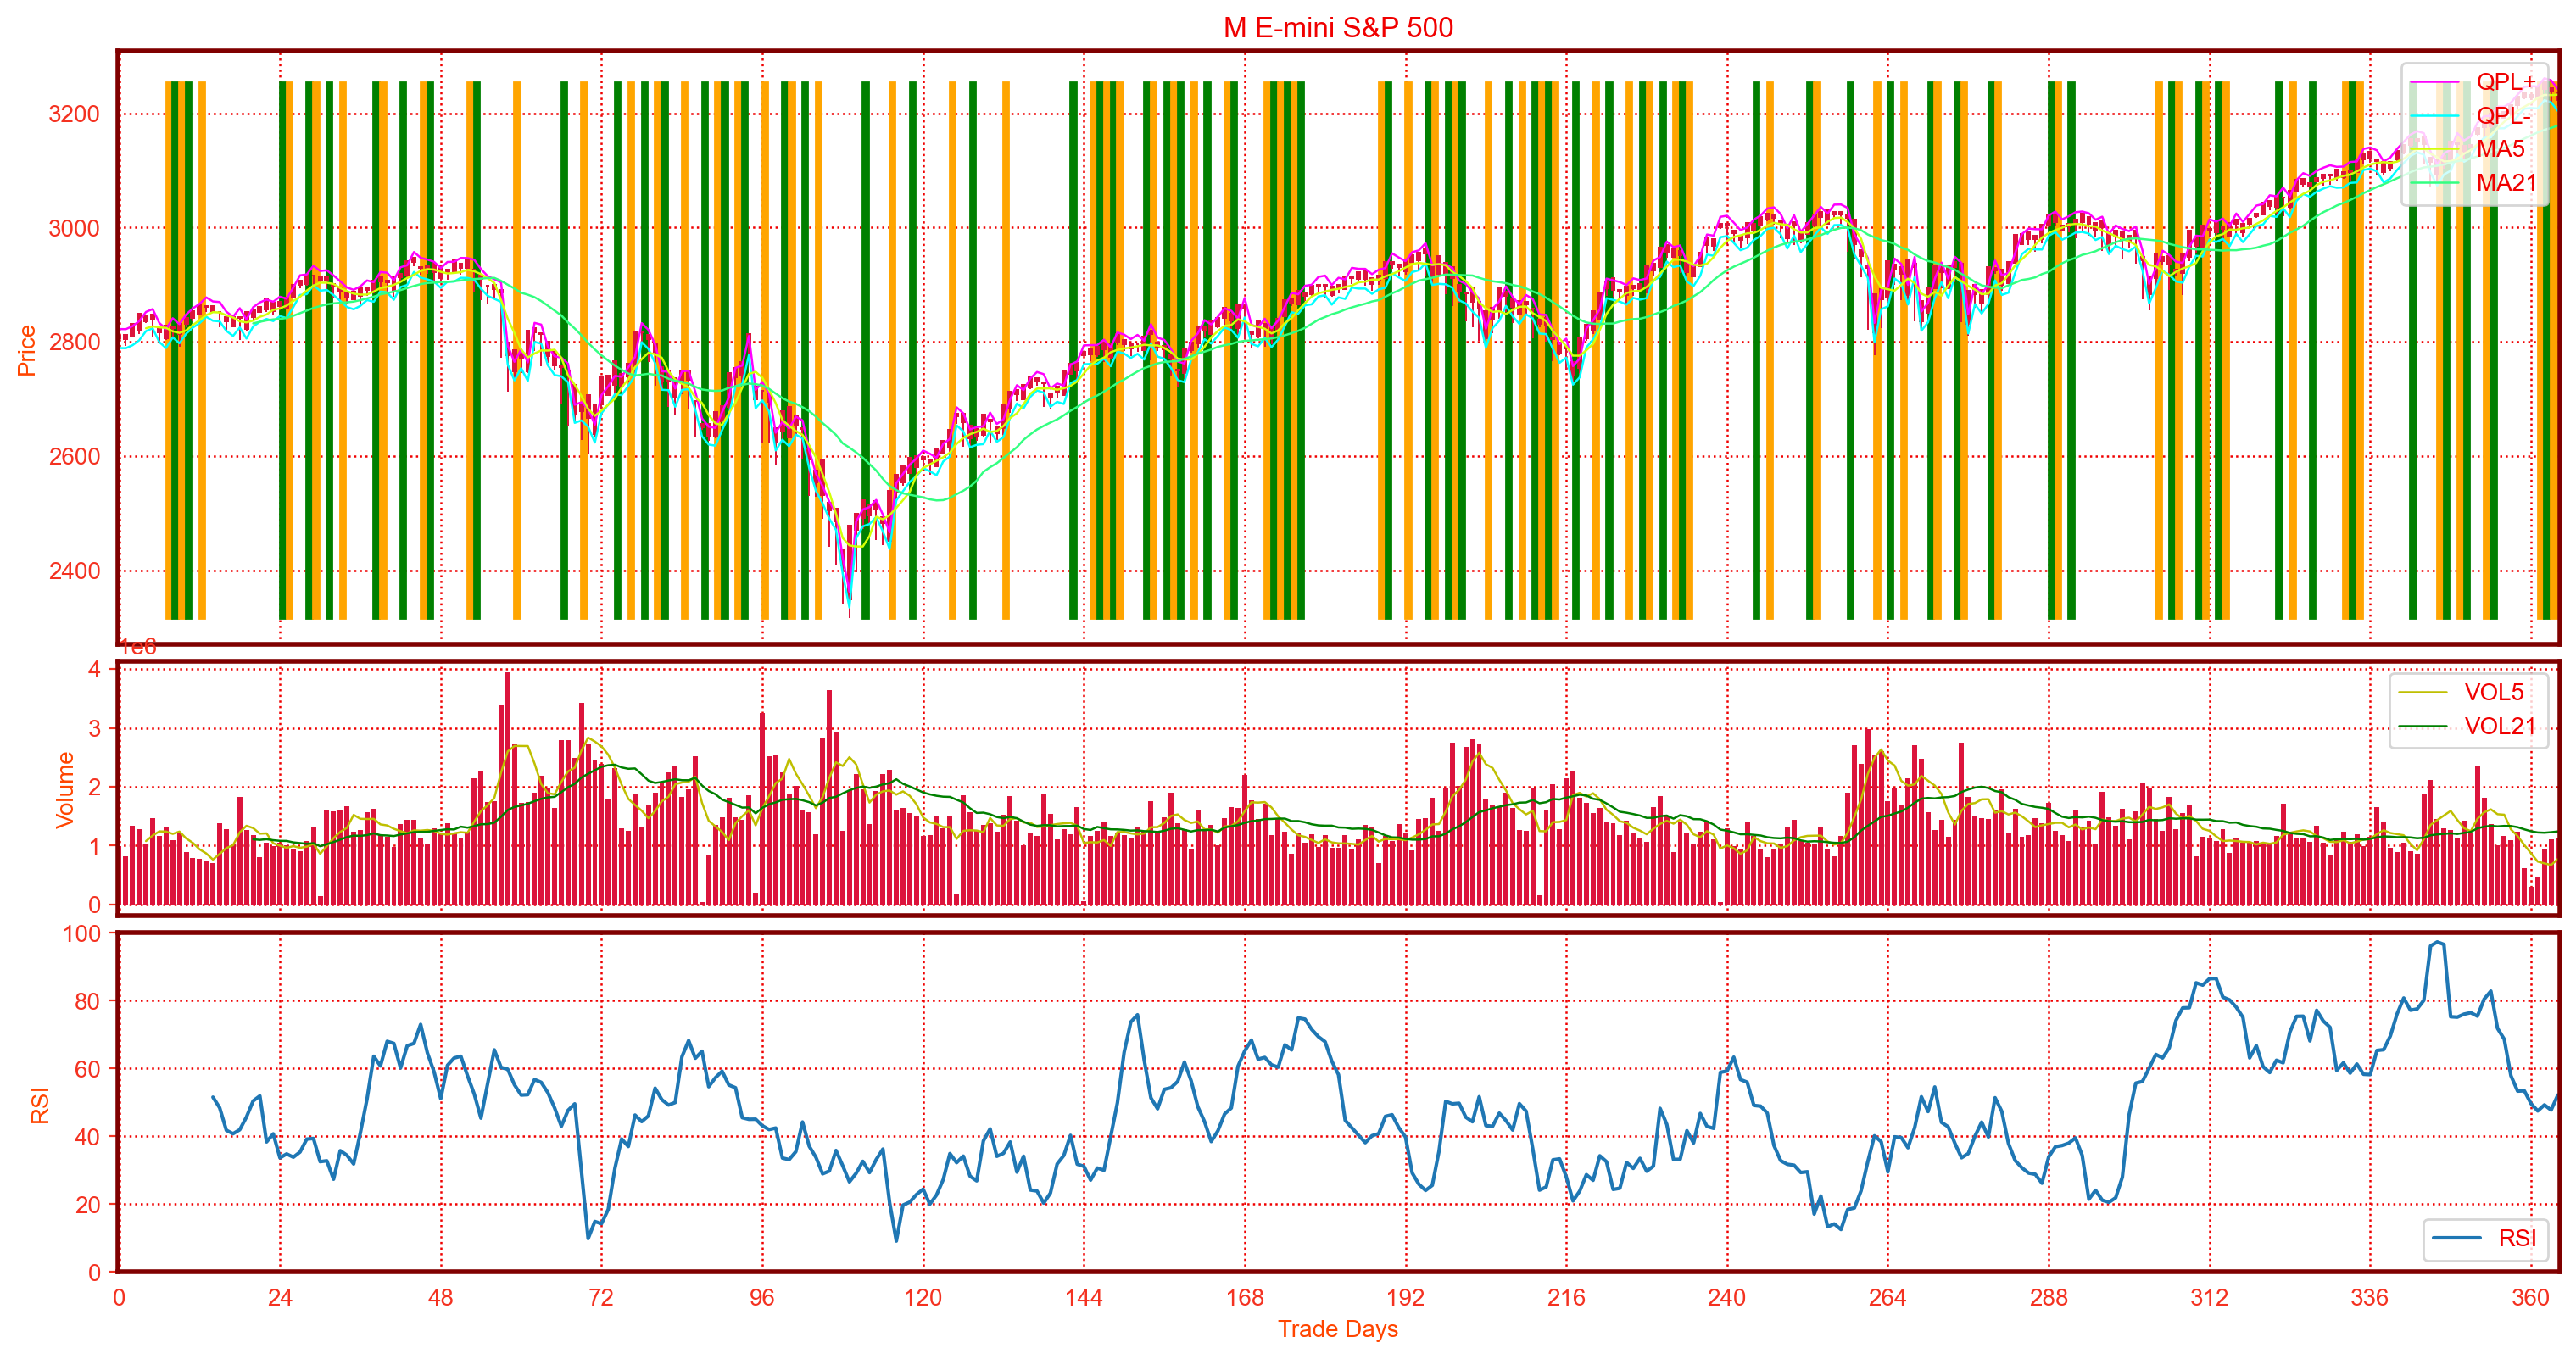

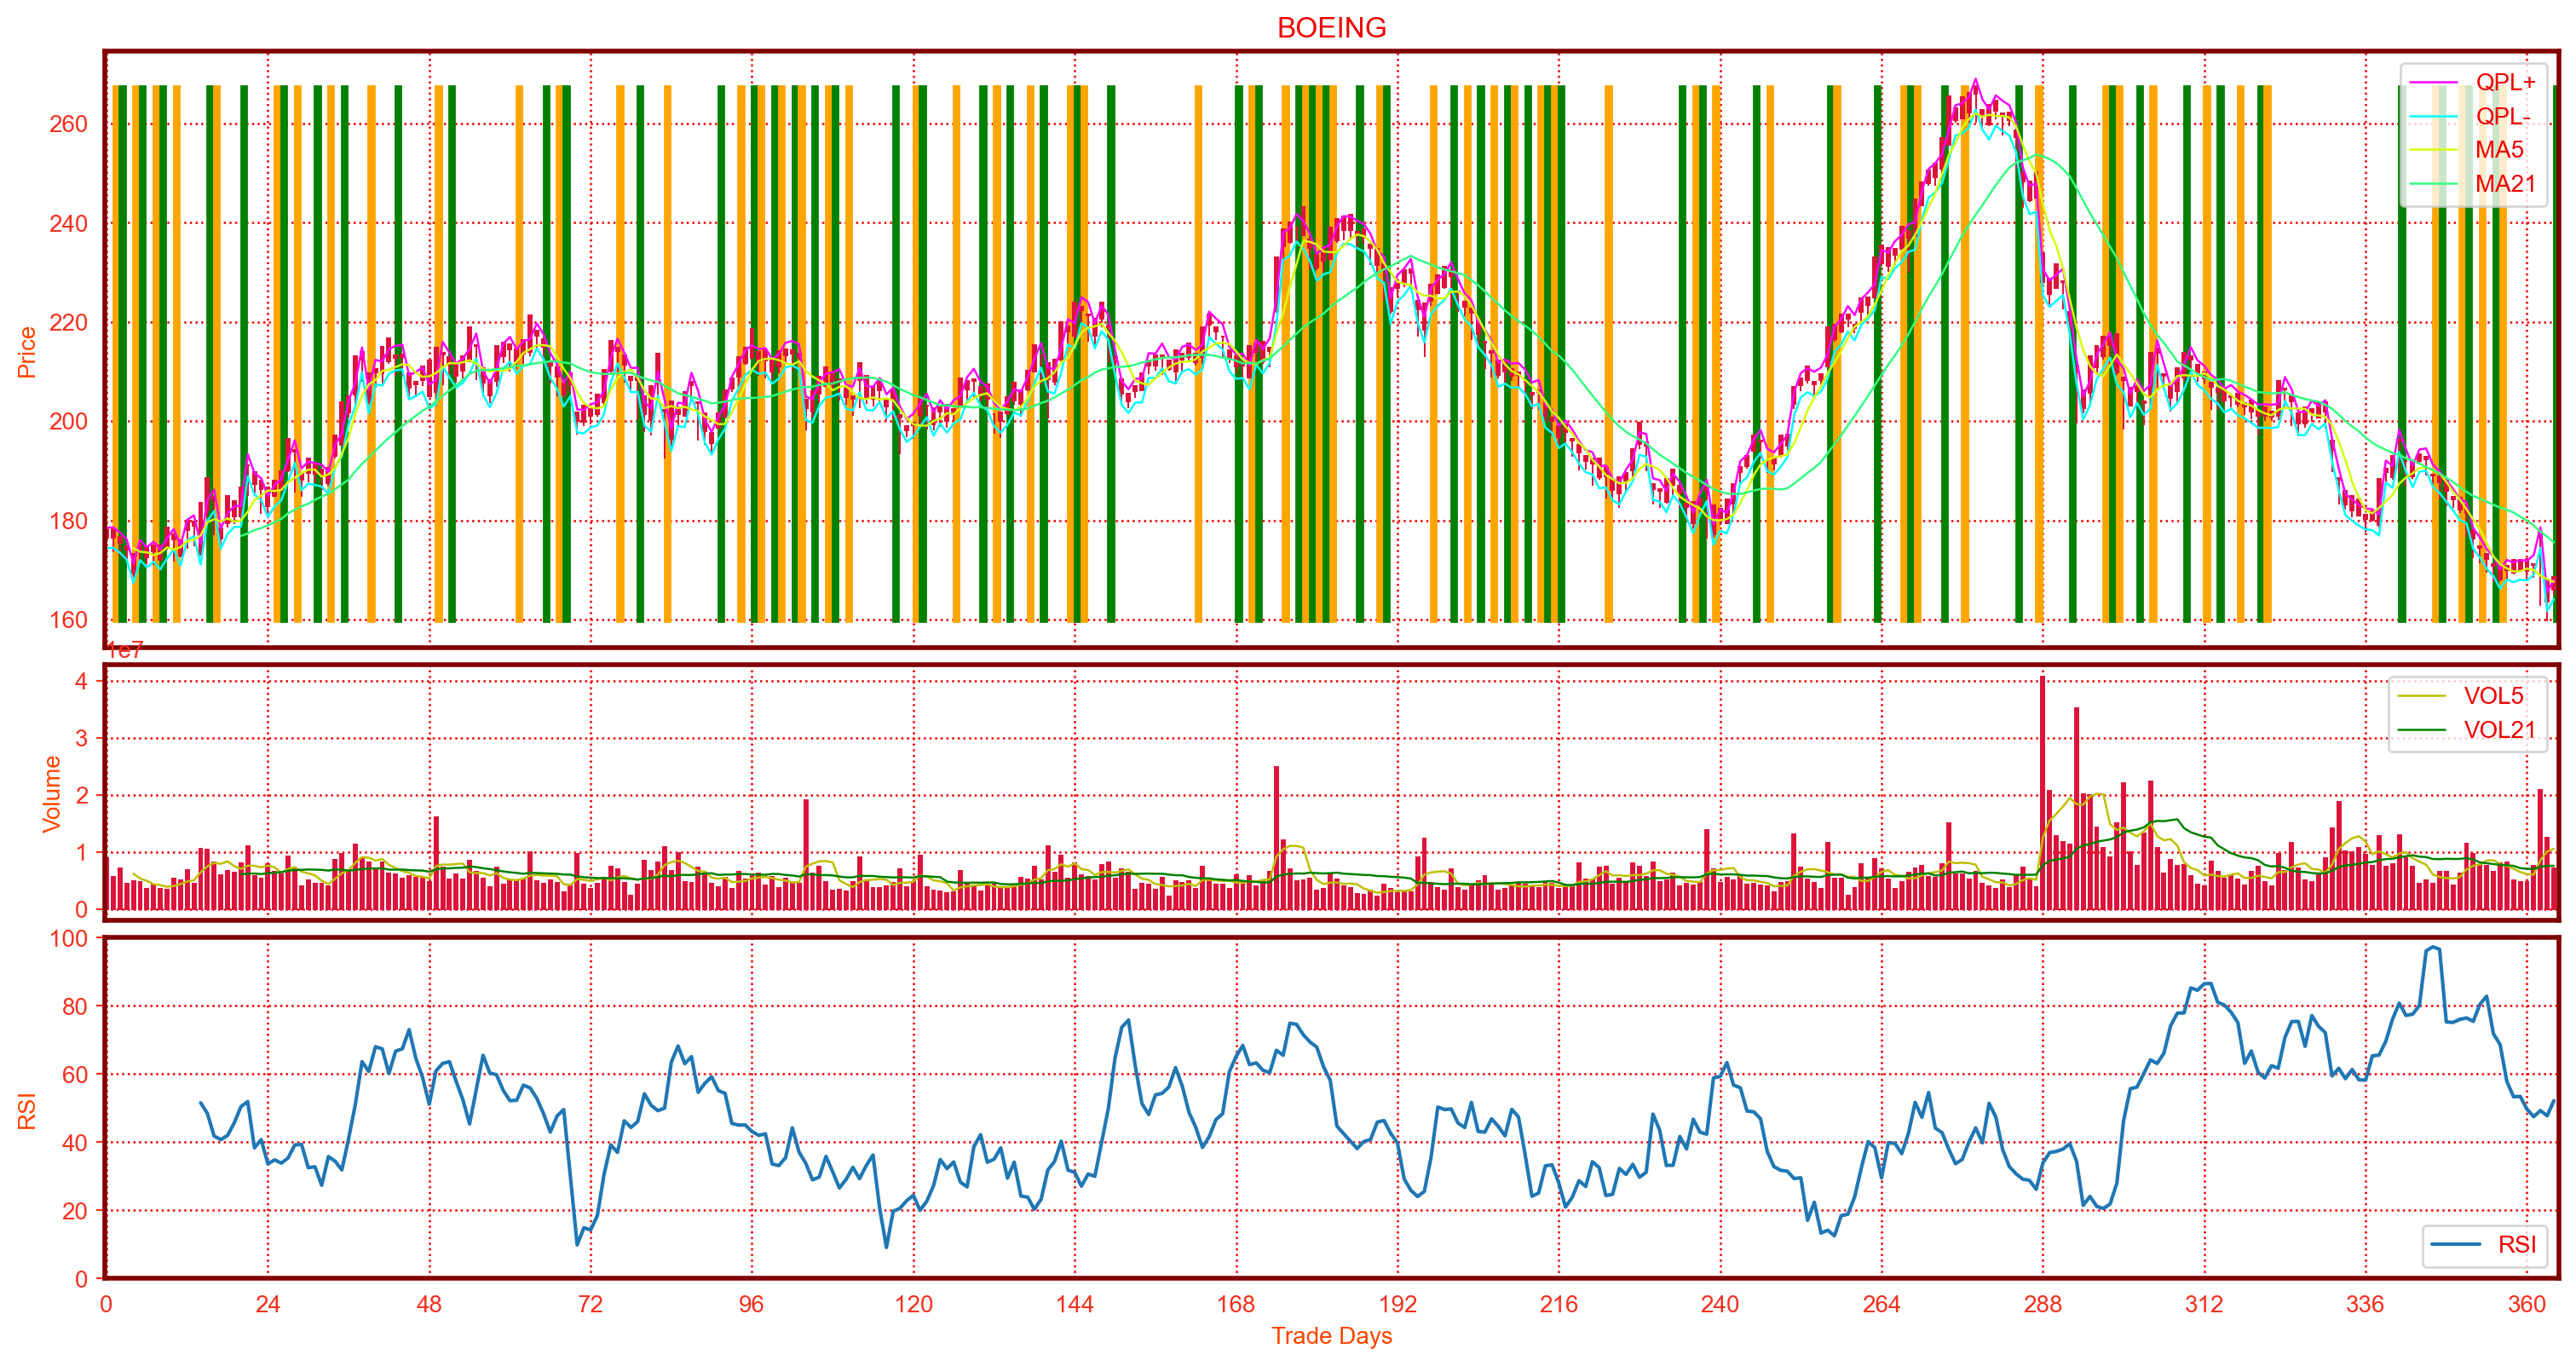

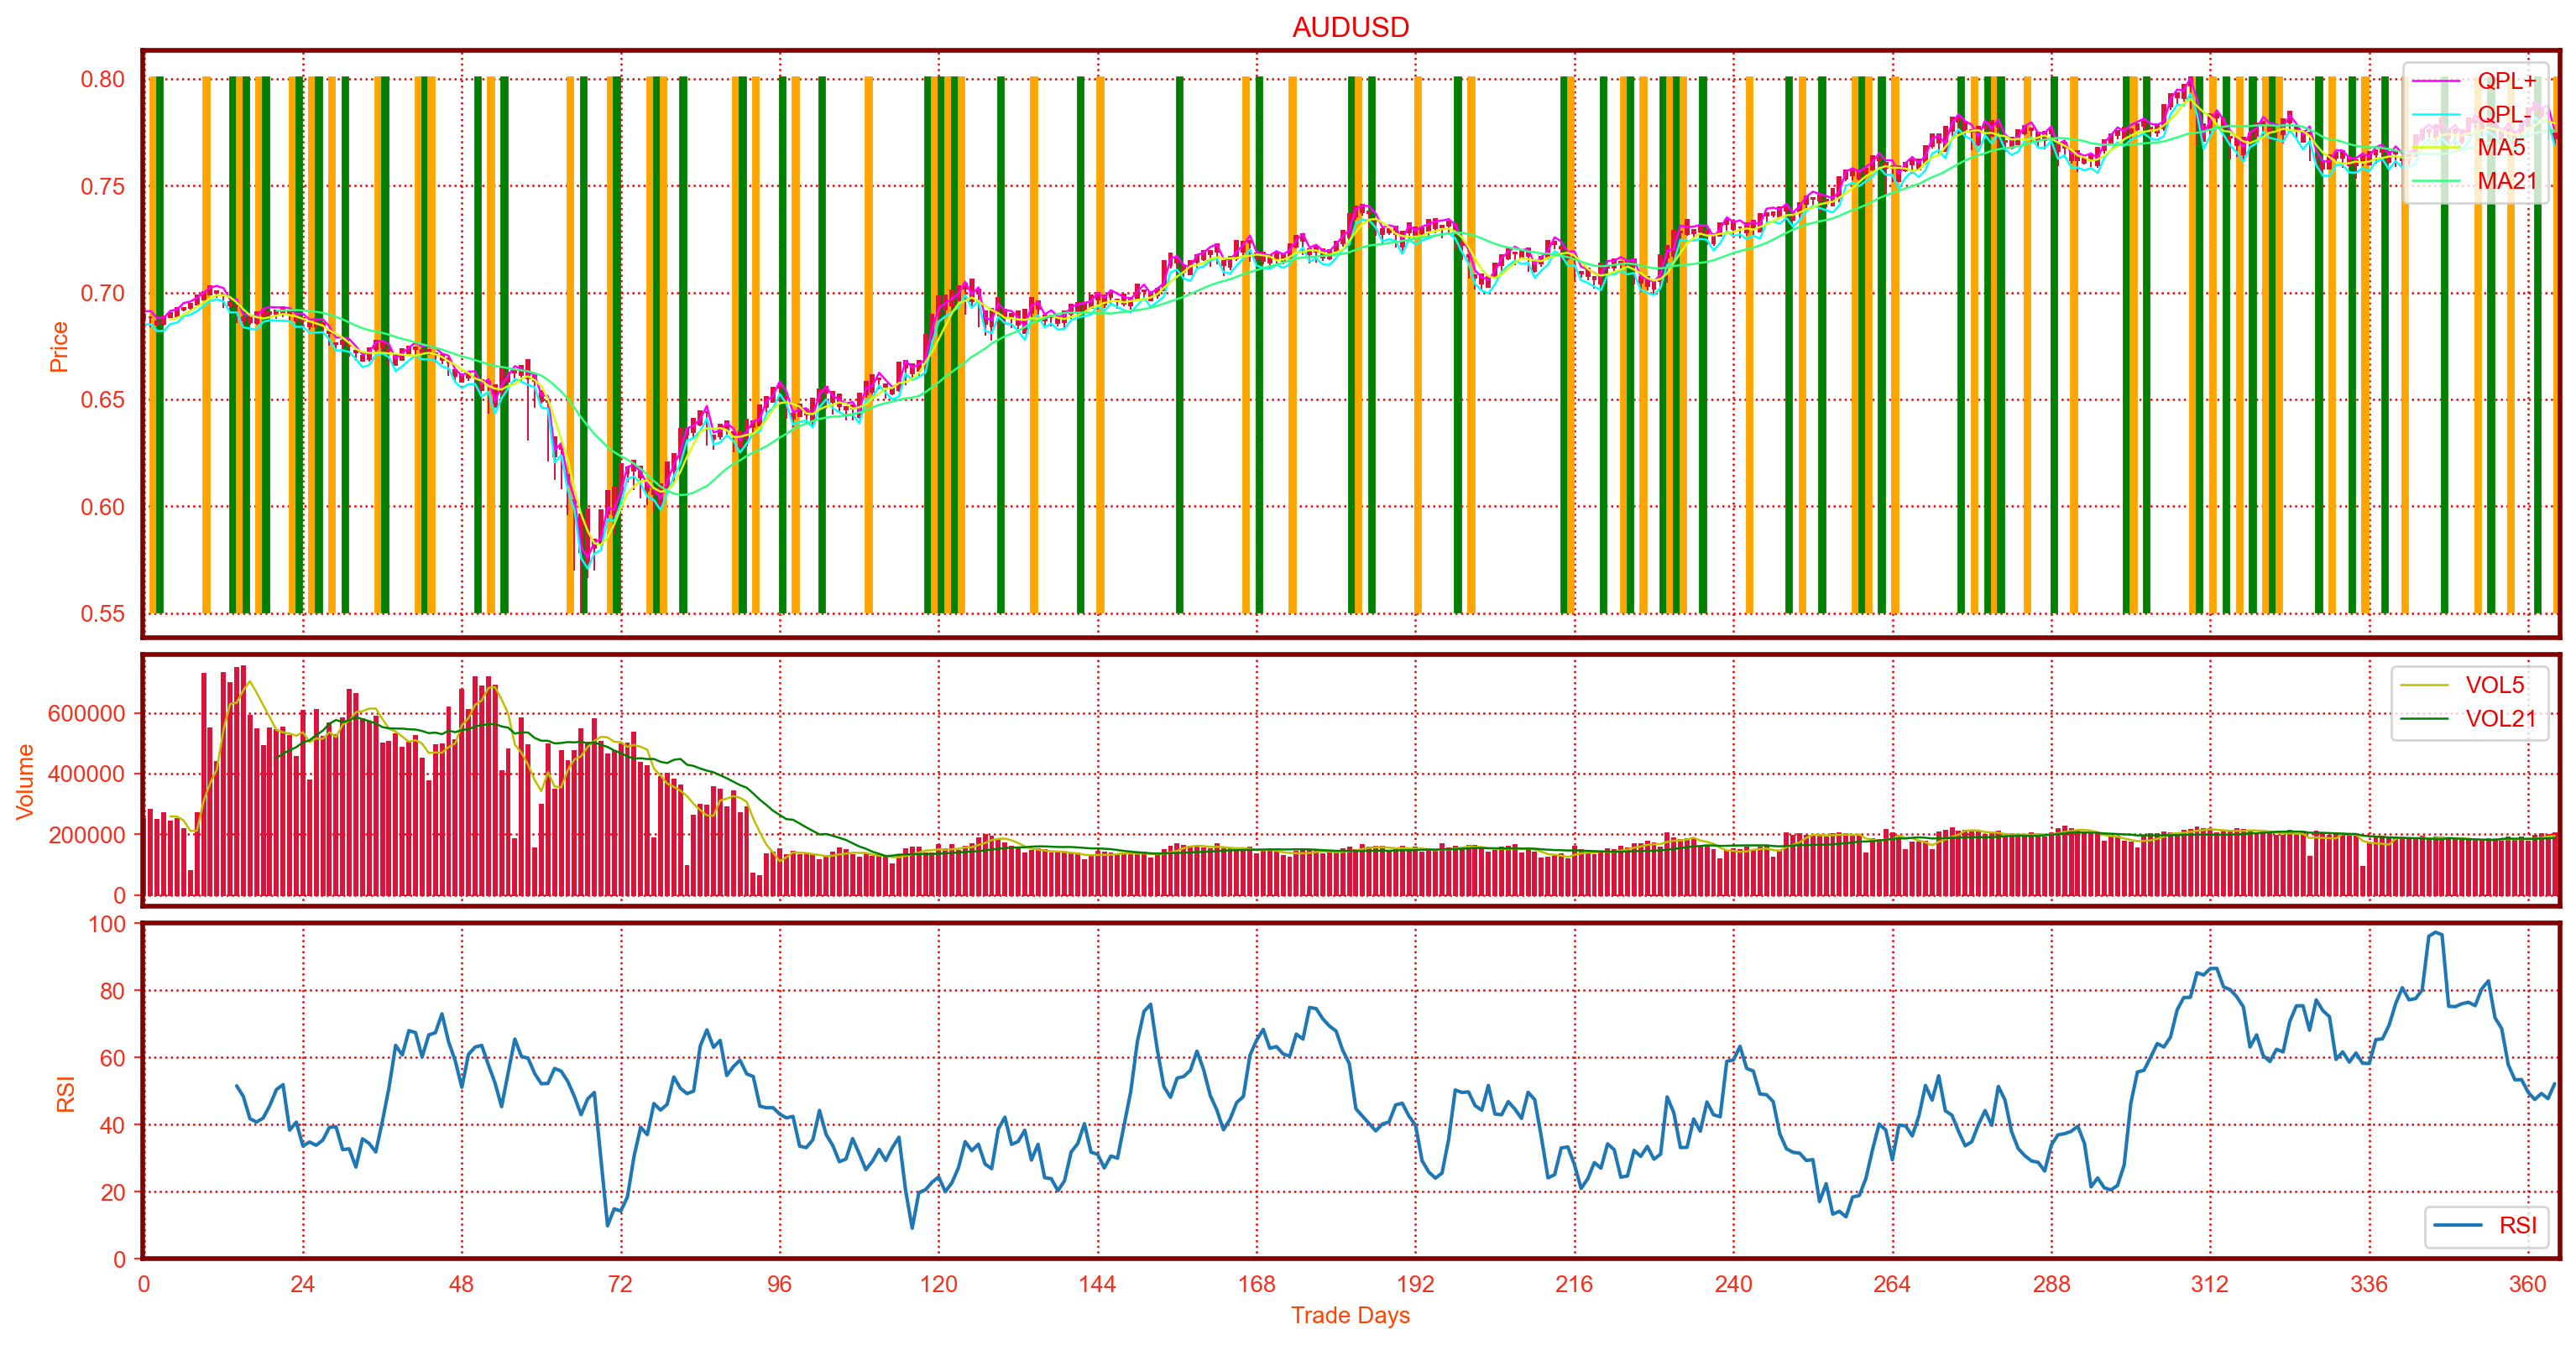

In [29]:
for product in Products:
    draw_transaction(product)

In [30]:
import zipfile

def zip_folder(folder_path):
    # Get the base name of the folder
    base_name = os.path.basename(folder_path)

    # Create a zip file with the same name as the folder
    zip_file_path = f"{base_name}.zip"
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through each file and subfolder in the folder
        for root, _, files in os.walk(folder_path):
            for file in files:
                # Get the full path of the file
                file_path = os.path.join(root, file)
                # Add the file to the zip file, using relative path
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

    return zip_file_path